## Group Project - Risk Measurement

Group members:
Milo LEBOVICI (74544),
Paul PEBEREAU (73148),
Hexuan YANG (80525),
Thomas MARTARESCHE (80369),
Laurie SCRIBOT (74706)

## Data inspection

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

We import the data first

In [100]:
data=pd.read_excel('Risk Measurement data for group assignment.xlsx', skiprows=9)#We skip the first 9 rows that are empty
data

,date,Mkt,Tsies,CorpIG,CorpHY,AR,Oil
0,1994-12-30,1.000000,1.000000,1.000000,1.000000,1.000000,17.77
1,1995-01-03,0.997600,0.997267,0.997864,1.000572,1.008810,17.45
2,1995-01-04,1.001092,1.001366,1.001542,1.002199,1.015014,17.56
3,1995-01-05,1.000791,0.997262,0.999229,1.004223,1.014720,17.76
4,1995-01-06,1.002793,0.997943,1.000934,1.002199,1.013431,17.69
...,...,...,...,...,...,...,...
7276,2023-11-24,16.959925,1.238759,4.554430,6.677048,8.169667,74.83
7277,2023-11-27,16.924479,1.246711,4.586613,6.691299,8.159373,74.46
7278,2023-11-28,16.938187,1.251725,4.599442,6.709730,8.155375,76.09
7279,2023-11-29,16.943438,1.258796,4.630573,6.750594,8.148525,77.56


We reorganize it to make it easier to read

In [101]:
data['date']=pd.to_datetime(data['date'])
data.set_index('date',inplace=True)
data

,Mkt,Tsies,CorpIG,CorpHY,AR,Oil
date,,,,,,
1994-12-30,1.000000,1.000000,1.000000,1.000000,1.000000,17.77
1995-01-03,0.997600,0.997267,0.997864,1.000572,1.008810,17.45
1995-01-04,1.001092,1.001366,1.001542,1.002199,1.015014,17.56
1995-01-05,1.000791,0.997262,0.999229,1.004223,1.014720,17.76
1995-01-06,1.002793,0.997943,1.000934,1.002199,1.013431,17.69
...,...,...,...,...,...,...
2023-11-24,16.959925,1.238759,4.554430,6.677048,8.169667,74.83
2023-11-27,16.924479,1.246711,4.586613,6.691299,8.159373,74.46
2023-11-28,16.938187,1.251725,4.599442,6.709730,8.155375,76.09


In [102]:
data.shape # See the number of rows and columns

(7281, 6)

In [103]:
data.columns #Here we check if there are spaces/blanks that might bother us later.

Index(['Mkt', 'Tsies', 'CorpIG', 'CorpHY', 'AR', 'Oil'], dtype='object')

There is no space issue in the data set column names.

We now check if there are missing values.

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7281 entries, 1994-12-30 to 2023-11-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt     7281 non-null   float64
 1   Tsies   7281 non-null   float64
 2   CorpIG  7281 non-null   float64
 3   CorpHY  7281 non-null   float64
 4   AR      7281 non-null   float64
 5   Oil     7281 non-null   float64
dtypes: float64(6)
memory usage: 398.2 KB


There is no missing value in the dataset. We now want to make sure there is no outliar in the dataset.

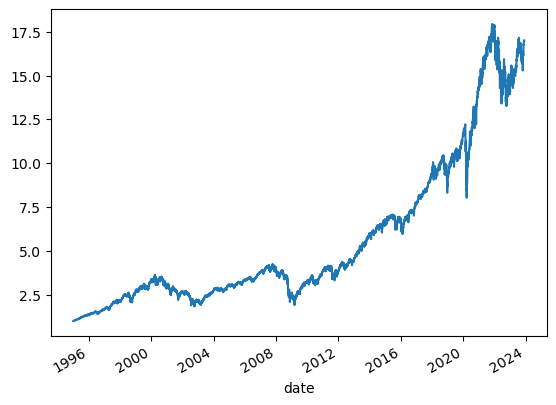

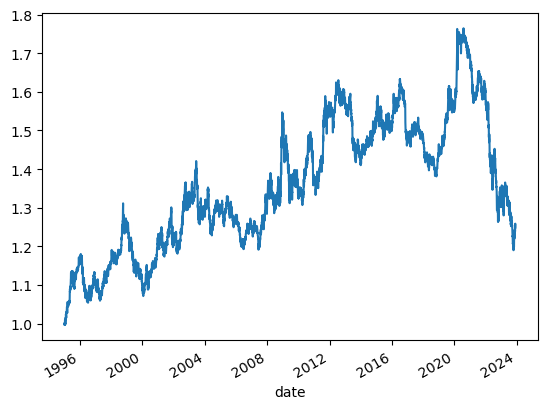

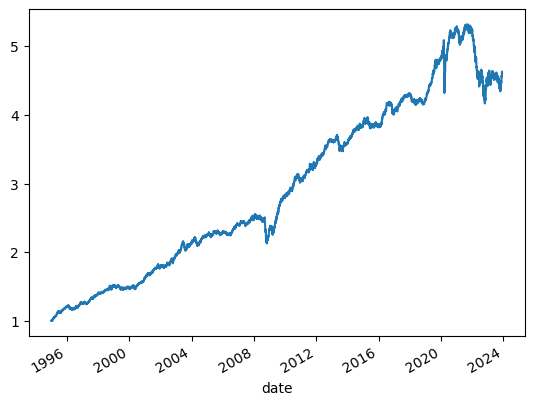

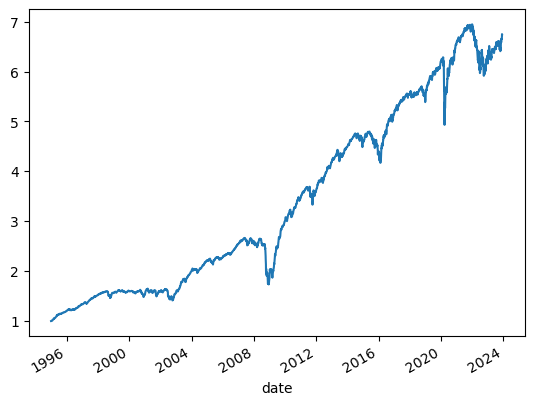

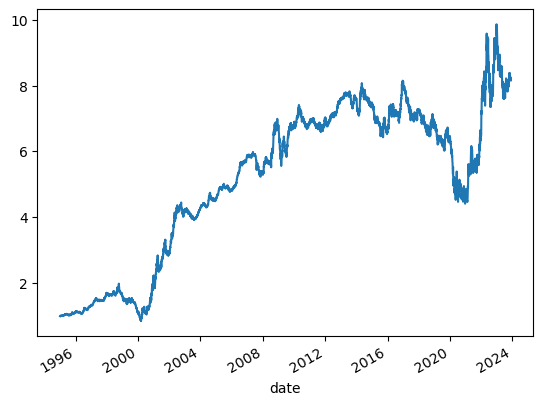

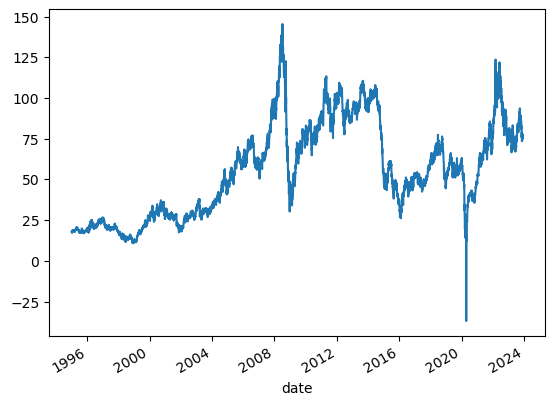

In [105]:
for i in data.columns:
    if data[i].dtypes == 'float64':
        fig = plt.figure()
        ax = data[i].plot()

It looks like the column Oil has an outlier just after 2020. To handle this issue we decided to replace this value by the average between the value before and the value after this cell.

In [106]:
for i in range(len(data)):
    if data['Oil'][i] < -1: #we see that the outliar is a data close to -2 so we can identify it easily by using this condition
        data['Oil'][i] = (data['Oil'][i - 1] + data['Oil'][i + 1]) / 2

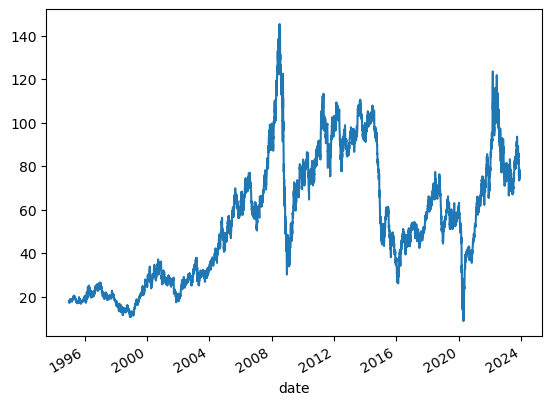

In [107]:
if data['Oil'].dtypes == 'float64':
        fig = plt.figure()
        ax = data['Oil'].plot()

There are no more strange values in the Oil column.Let's now check if there are any duplicates in the Data provided.

In [108]:
duplicates_exist = data.duplicated().any()

if duplicates_exist:
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


## Risk measures

Let's first build our portfolios.

In [109]:
Portfolios_weigths = pd.DataFrame({
    'Portfolio Type': ['Default Portfolio', 'Augmented Portfolio'],
    'Mkt': [0.5, 0.4],
    'Tsies': [0.20,0.35],
    'CorpIG': [0.05,0.00],
   'CorpHY': [0.05,0.00],
    'AR': [0.15,0.25],
    'Oil': [0.05,0.00],
})
Portfolios_weigths=Portfolios_weigths.set_index(['Portfolio Type'])
Portfolios_weigths

,Mkt,Tsies,CorpIG,CorpHY,AR,Oil
Portfolio Type,,,,,,
Default Portfolio,0.5,0.20,0.05,0.05,0.15,0.05
Augmented Portfolio,0.4,0.35,0.00,0.00,0.25,0.00


In [110]:
Portfolio_Value=pd.DataFrame()
Portfolio_Value.index=data.index
data1=data.copy()
data2=data.copy()
for x in Portfolios_weigths.columns:
    data1[x]=data1[x]*Portfolios_weigths[x]['Default Portfolio']
    data2[x]=data2[x]*Portfolios_weigths[x]['Augmented Portfolio']
L1=list(data1.sum(axis=1))
L2=list(data2.sum(axis=1))
Portfolio_Value['Default Portfolio Value']=L1
Portfolio_Value['Augmented Portfolio Value']=L2
Portfolio_Value

,Default Portfolio Value,Augmented Portfolio Value
date,,
1994-12-30,1.838500,1.000000
1995-01-03,1.821997,1.000286
1995-01-04,1.831258,1.004668
1995-01-05,1.840228,1.003038
1995-01-06,1.837656,1.003755
...,...,...
2023-11-24,14.256238,9.259952
2023-11-27,14.222383,9.245984
2023-11-28,14.312704,9.252222


In [111]:
Returns_Default_Portfolio = Portfolio_Value["Default Portfolio Value"].pct_change(5)
df_returns_default = pd.DataFrame({'Returns_Default_Portfolio': Returns_Default_Portfolio})
df_returns_default.dropna()

,Returns_Default_Portfolio
date,
1995-01-09,-0.008549
1995-01-10,0.001607
1995-01-11,0.004253
1995-01-12,-0.000282
1995-01-13,-0.000573
...,...
2023-11-24,0.012324
2023-11-27,-0.002909
2023-11-28,-0.006249


In [112]:
Returns_Augmented_Portfolio = Portfolio_Value["Augmented Portfolio Value"].pct_change(5).dropna()
df_returns_augmented = pd.DataFrame({'Returns_Augmented_Portfolio': Returns_Augmented_Portfolio})
df_returns_augmented

,Returns_Augmented_Portfolio
date,
1995-01-09,0.002754
1995-01-10,0.003146
1995-01-11,-0.000773
1995-01-12,0.000152
1995-01-13,0.006540
...,...
2023-11-24,0.008669
2023-11-27,0.003480
2023-11-28,-0.000012


In [113]:
df_returns = pd.merge(df_returns_default, df_returns_augmented, left_index=True, right_index=True, how='outer').dropna()
df_returns

,Returns_Default_Portfolio,Returns_Augmented_Portfolio
date,,
1995-01-09,-0.008549,0.002754
1995-01-10,0.001607,0.003146
1995-01-11,0.004253,-0.000773
1995-01-12,-0.000282,0.000152
1995-01-13,-0.000573,0.006540
...,...,...
2023-11-24,0.012324,0.008669
2023-11-27,-0.002909,0.003480
2023-11-28,-0.006249,-0.000012


## GARCH Building

In [114]:
# Define the start and end dates for the five-year period
start_date = '1995-01-01'
end_date = '2015-11-30'

# Five past years of daily data
df_returns_1994_2015 = df_returns[start_date:end_date]
GARCH = pd.DataFrame(index=df_returns_1994_2015.index)
EWMA = pd.DataFrame(index=df_returns_1994_2015.index)

In [115]:
import scipy.optimize as opt

def compute_omega(factor,alpha,beta):
    persistence = alpha + beta
    return factor *(1-persistence)

def compute_cond_var(data,initial_value,alpha,beta,omega=None):
    if omega is None:
        omega = compute_omega(initial_value,alpha,beta)
    cond_var = np.array([initial_value], dtype=np.float64)
    for time in range(1,len(data)):
        cond_var = np.append(cond_var,(omega +beta*cond_var[time-1]+alpha*data[time-1]**2))
    return cond_var
def fn(x, df, df1, r_var):
    sig_2 = compute_cond_var(df, r_var,x[0],x[1])[:-1]
    return (np.log(sig_2)+df1[1:]/sig_2).sum()*1/2

In [116]:
df_returns_1994_2015

,Returns_Default_Portfolio,Returns_Augmented_Portfolio
date,,
1995-01-09,-0.008549,0.002754
1995-01-10,0.001607,0.003146
1995-01-11,0.004253,-0.000773
1995-01-12,-0.000282,0.000152
1995-01-13,-0.000573,0.006540
...,...,...
2015-11-23,-0.010296,0.005652
2015-11-24,0.010219,0.010538
2015-11-25,0.005172,0.001977


In [117]:
# GARCH COMPUTATION DEFAULT
returns_squared = df_returns_1994_2015['Returns_Default_Portfolio']**2
returns = df_returns_1994_2015['Returns_Default_Portfolio']

res = opt.minimize(fn, [0.08,0.82], bounds=[[0,1],[0,1]],
                    args=(returns, returns_squared, returns.std()**2))

cond_var_DM = compute_cond_var(returns, returns_squared.iloc[0], res.x[0], res.x[1])
GARCH['Returns_Default_Portfolio'] = np.sqrt(cond_var_DM)

# Print or use the result as needed
print('GARCH (1,1) Ann. LT Volatility of Default Mix Portfolio', GARCH['Returns_Default_Portfolio'].mean()*100, '%')

unscaled_alpha, unscaled_beta = res.x
scaled_alpha = unscaled_alpha
scaled_beta = unscaled_beta/10
unscaled_omega = (1 - (scaled_alpha + scaled_beta)) * GARCH['Returns_Default_Portfolio'].mean()
scaled_omega = unscaled_omega*10.000
results_DM = [unscaled_alpha, unscaled_beta]
print(f'scaled omega is: {scaled_omega:.4f}\n\
scaled alpha is:  {scaled_alpha:.4f}\n\
scaled beta is: {scaled_beta:.4f}')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_580\694108153.py:16: RuntimeWarning: invalid value encountered in log
  return (np.log(sig_2)+df1[1:]/sig_2).sum()*1/2


GARCH (1,1) Ann. LT Volatility of Default Mix Portfolio 1.801125584037293 %
scaled omega is: 0.1152
scaled alpha is:  0.3097
scaled beta is: 0.0505


In [118]:
# GARCH COMPUTATION AUGMENTED
returns_squared = df_returns_1994_2015['Returns_Augmented_Portfolio']**2
returns = df_returns_1994_2015['Returns_Augmented_Portfolio']

res = opt.minimize(fn, [0.08,0.82], bounds=[[0,1],[0,1]],
                    args=(returns, returns_squared, returns.std()**2))

cond_var_AP = compute_cond_var(returns, returns_squared.iloc[0], res.x[0], res.x[1])
GARCH['Returns_Augmented_Portfolio'] = np.sqrt(cond_var_AP)
print('GARCH (1,1) LT Volatility of Augmented Portfolio', GARCH['Returns_Augmented_Portfolio'].mean()*100, '%')

unscaled_alpha, unscaled_beta = res.x
scaled_alpha = unscaled_alpha
scaled_beta = unscaled_beta/10
unscaled_omega = (1 - (scaled_alpha + scaled_beta)) * GARCH['Returns_Augmented_Portfolio'].mean()
scaled_omega = unscaled_omega*10.000
results_AP = [unscaled_alpha, unscaled_beta]

print(f'scaled omega is: {scaled_omega:.4f}\n\
scaled alpha is:  {scaled_alpha:.4f}\n\
scaled beta is: {scaled_beta:.4f}')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_580\694108153.py:16: RuntimeWarning: invalid value encountered in log
  return (np.log(sig_2)+df1[1:]/sig_2).sum()*1/2


GARCH (1,1) LT Volatility of Augmented Portfolio 0.8554131821300758 %
scaled omega is: 0.0661
scaled alpha is:  0.1466
scaled beta is: 0.0810


## GARCH Out of Sample Testing

In [119]:
# Define the start and end dates for the five-year period
start_date = '2015-12-01'
# Five past years of daily data
df_returns_2015= df_returns.loc[start_date:]
GARCH_OOS = pd.DataFrame(index=df_returns_2015.index)
#EWMA_OOS = pd.DataFrame(index=df_returns_2015.index)

In [120]:
#GARCH Out of Sample
cond_var_AP_2015 = compute_cond_var(df_returns_2015['Returns_Augmented_Portfolio'], df_returns_2015['Returns_Augmented_Portfolio'].iloc[0]**2, results_AP[0], results_AP[1])
GARCH_OOS['Returns_Augmented_Portfolio'] = np.sqrt(cond_var_AP_2015)

cond_var_DM_2015 = compute_cond_var(df_returns_2015['Returns_Default_Portfolio'], df_returns_2015['Returns_Default_Portfolio'].iloc[0]**2, results_DM[0], results_DM[1])
GARCH_OOS['Returns_Default_Portfolio'] = np.sqrt(cond_var_DM_2015)

In [121]:
GARCH_OOS["AP_Z"] = df_returns_2015['Returns_Augmented_Portfolio']/GARCH_OOS['Returns_Augmented_Portfolio']
GARCH_OOS["DP_Z"] = df_returns_2015['Returns_Default_Portfolio']/GARCH_OOS['Returns_Default_Portfolio']
print(GARCH_OOS)

GARCH_OOS_W = GARCH_OOS.resample("W").last()

            Returns_Augmented_Portfolio  Returns_Default_Portfolio      AP_Z  \
date                                                                           
2015-12-01                     0.005861                   0.014100  1.000000   
2015-12-02                     0.005861                   0.014100 -0.749124   
2015-12-03                     0.005670                   0.012739 -1.898113   
2015-12-04                     0.006671                   0.012294 -0.207143   
2015-12-07                     0.006149                   0.011002 -0.616569   
...                                 ...                        ...       ...   
2023-11-24                     0.016414                   0.011331  0.528144   
2023-11-27                     0.015187                   0.012195  0.229113   
2023-11-28                     0.013784                   0.010704 -0.000887   
2023-11-29                     0.012463                   0.010335  0.220451   
2023-11-30                     0.011329 

In [122]:
GARCH_OOS_DP_Z_SCORE = GARCH_OOS["DP_Z"].mean()
GARCH_OOS_AP_Z_SCORE = GARCH_OOS["AP_Z"].mean()
print("GARCH Default Portfolio Z score = ",GARCH_OOS_DP_Z_SCORE," GARCH Augmented Portfolio Z score = ", GARCH_OOS_AP_Z_SCORE)

GARCH Default Portfolio Z score =  0.1563005274473819  GARCH Augmented Portfolio Z score =  0.16308552885444308


# EWMA Building & OOS Testing

- Train set (1994 - 1st December of 2015): the idea is to find a lambda that maximizes the sum of the LogLikelihoods. In her Excel, Huexan found that the lambda maximizing this sum is equal to 0.94. This result corresponds to the usual value used for daily returns.


- Test set (1st December of 2015) -2023): Now we got the lambda thanks to Huexan's Excel solver, we have to predict variances values from for the OOS period (so the test set period). We use EWMA to do this by using lambda = 0.94. Once we get all the variances, we compute the vol and finally the daily Z-scores.

FYI, I estimated all the variances with lambda = 0.94 for the train and test sets and then I just keep the OOS values to calculate the mean of the Z-Scores.

In [123]:
#I add some columns to the Portfolio_Value df

Portfolio_Value['Default Portfolio Returns'] = Portfolio_Value['Default Portfolio Value'].pct_change(5).dropna() #returns of DP
Portfolio_Value['Augmented Portfolio Returns']=Portfolio_Value['Augmented Portfolio Value'].pct_change(5).dropna() #returns of AP
Portfolio_Value['Default Portfolio Returns^2'] = Portfolio_Value['Default Portfolio Returns']**2 #returns^2 of DP
Portfolio_Value['Augmented Portfolio Returns^2'] = Portfolio_Value['Augmented Portfolio Returns']**2 #returns^2 of AP

In [124]:
#I create an empty dataframe to stock all the volatilities for train set as well as test set
EWMA_Volatilities =pd.DataFrame(index=Portfolio_Value[5:].index)

Default Portfolio Volatilities

In [125]:
Portfolio_Value_Witouht_NA=Portfolio_Value[5:] # I delete the first row containing NA values
lambda_value=0.94

EWMA_variances=[] #I create an empty list to stock all the variances values

EWMA_variances.append(Portfolio_Value_Witouht_NA['Default Portfolio Returns^2'].iloc[0]) #We set the first variance of the list as r^2 of the first date

for i in range(1,len(Portfolio_Value_Witouht_NA['Default Portfolio Returns^2'])): #EWMA model formula for all the dates and we stock the values in the list created above
    EWMA_variances.append((1 - lambda_value) * Portfolio_Value_Witouht_NA['Default Portfolio Returns^2'].iloc[i-1]+ (lambda_value) * EWMA_variances[i-1])

EWMA_vol_Default_Portfolio=np.sqrt(EWMA_variances) # We compute the volatilities

EWMA_Volatilities['Vol Default Portfolio'] = EWMA_vol_Default_Portfolio # We stock them in the dataframe

Augmented Portfolio Volatilities

In [126]:
lambda_value=0.94
EWMA_variances_Augmented=[]

EWMA_variances_Augmented.append(Portfolio_Value_Witouht_NA['Augmented Portfolio Returns^2'].iloc[0])

for i in range(1,len(Portfolio_Value_Witouht_NA['Augmented Portfolio Returns^2'])):
    EWMA_variances_Augmented.append((1 - lambda_value) * Portfolio_Value_Witouht_NA['Augmented Portfolio Returns^2'].iloc[i-1]+ (lambda_value) * EWMA_variances_Augmented[i-1])


EWMA_vol_Augmented_Portfolio=np.sqrt(EWMA_variances_Augmented)

EWMA_Volatilities['Vol Augmented Portfolio'] = EWMA_vol_Augmented_Portfolio

Z-Scores calculations

In [127]:
EWMA_Volatilities['DP_Z']=Portfolio_Value['Default Portfolio Returns']/EWMA_Volatilities['Vol Default Portfolio']
EWMA_Volatilities['AP_Z']=Portfolio_Value['Augmented Portfolio Returns']/EWMA_Volatilities['Vol Augmented Portfolio']

Calculations of Z-Scores means on the OOS data

In [128]:
#We create a new dataframe called "EWMA_OOS" that takes all the values of the former dataframe from 1st December of 2015

start_index = EWMA_Volatilities.index.get_loc('2015-12-01')
EWMA_OOS = EWMA_Volatilities.iloc[start_index:]
EWMA_OOS

EWMA_OOS_W = EWMA_OOS.resample('W').last()
EWMA_OOS_W

,Vol Default Portfolio,Vol Augmented Portfolio,DP_Z,AP_Z
date,,,,
2015-12-06,0.019759,0.010330,-0.254951,-0.133773
2015-12-13,0.022097,0.010190,-2.247928,-2.075755
2015-12-20,0.023071,0.010836,-0.502177,-0.740330
2015-12-27,0.021038,0.009799,1.234753,0.907815
2016-01-03,0.022533,0.010548,-0.126367,-0.693856
...,...,...,...,...
2023-11-05,0.019747,0.016007,0.863737,2.775369
2023-11-12,0.018982,0.020683,-0.656152,0.212678
2023-11-19,0.018254,0.020287,0.886527,0.955274


In [129]:
#We compute Z-Scores means

EWMA_DP_Z_SCORE = EWMA_OOS['DP_Z'].mean()
EWMA_AP_Z_SCORE = EWMA_OOS['AP_Z'].mean()
print("On average, EWMA Default Portfolio Z score = ",EWMA_DP_Z_SCORE," EWMA Augmented Portfolio Z score = ", EWMA_AP_Z_SCORE)

On average, EWMA Default Portfolio Z score =  0.11015214987666185  EWMA Augmented Portfolio Z score =  0.13685950947744455


# Model comparison and choice

Start by merging the z-scores of both models into a single dataframe

In [130]:
df1_last_two = GARCH_OOS_W.iloc[:, -2:]
df2_last_two = EWMA_OOS_W.iloc[:, -2:]

GARCH_EWMA_Z_SCORE = pd.merge(df1_last_two, df2_last_two, left_index=True, right_index=True)
GARCH_EWMA_Z_SCORE.columns.values[0] = "AP_GARCH"
GARCH_EWMA_Z_SCORE.columns.values[1] = "DP_GARCH"
GARCH_EWMA_Z_SCORE.columns.values[2] = "DP_EWMA"
GARCH_EWMA_Z_SCORE.columns.values[3] = "AP_EWMA"

M = len(GARCH_EWMA_Z_SCORE)

print(GARCH_EWMA_Z_SCORE)

            AP_GARCH  DP_GARCH   DP_EWMA   AP_EWMA
date                                              
2015-12-06 -0.207143 -0.409753 -0.254951 -0.133773
2015-12-13 -2.544283 -1.949701 -2.247928 -2.075755
2015-12-20 -0.835571 -0.685772 -0.502177 -0.740330
2015-12-27  1.242169  2.149613  1.234753  0.907815
2016-01-03 -0.742978 -0.137685 -0.126367 -0.693856
...              ...       ...       ...       ...
2023-11-05  2.670310  0.977665  0.863737  2.775369
2023-11-12  0.199330 -0.775077 -0.656152  0.212678
2023-11-19  0.985521  1.034797  0.886527  0.955274
2023-11-26  0.528144  1.087660  0.721983  0.446219
2023-12-03  0.237226 -0.135139 -0.083536  0.155290

[418 rows x 4 columns]


## Criterion 1 : average bias

In [131]:
_df = GARCH_EWMA_Z_SCORE.copy()
# compute volatilities of the models's z-scores
DP_GARCH_vol = round(_df["DP_GARCH"].std(), 2)
AP_GARCH_vol = round(_df["AP_GARCH"].std(), 2)
DP_EWMA_vol = round(_df["DP_EWMA"].std(), 2)
AP_EWMA_vol = round(_df["AP_EWMA"].std(), 2)

# compute 95% confidence intervals
DP_GARCH_vol_ste_d = (1 - np.sqrt(2/M)) * DP_GARCH_vol
DP_GARCH_vol_ste_u = (1 + np.sqrt(2/M)) * DP_GARCH_vol
AP_GARCH_vol_ste_d = (1 - np.sqrt(2/M)) * AP_GARCH_vol
AP_GARCH_vol_ste_u = (1 + np.sqrt(2/M)) * AP_GARCH_vol
DP_EWMA_vol_ste_d = (1 - np.sqrt(2/M)) * DP_EWMA_vol
DP_EWMA_vol_ste_u = (1 + np.sqrt(2/M)) * DP_EWMA_vol
AP_EWMA_vol_ste_d = (1 - np.sqrt(2/M)) * AP_EWMA_vol
AP_EWMA_vol_ste_u = (1 + np.sqrt(2/M)) * AP_EWMA_vol

DP_GARCH_vol_conf = str(round(DP_GARCH_vol_ste_d, 2))+':'+str(round(DP_GARCH_vol_ste_u, 2))
AP_GARCH_vol_conf = str(round(AP_GARCH_vol_ste_d, 2))+':'+str(round(AP_GARCH_vol_ste_u, 2))
DP_EWMA_vol_conf = str(round(DP_EWMA_vol_ste_d, 2))+':'+str(round(DP_EWMA_vol_ste_u, 2))
AP_EWMA_vol_conf = str(round(AP_EWMA_vol_ste_d, 2))+':'+str(round(AP_EWMA_vol_ste_u, 2))

# create table
Criterion_one = pd.DataFrame({
    'z-scores': ['DP_GARCH', 'AP_GARCH', 'DP_EWMA', 'AP_EWMA'],
    'st dev': [DP_GARCH_vol, AP_GARCH_vol, DP_EWMA_vol, AP_EWMA_vol],
    '95% conf': [DP_GARCH_vol_conf, AP_GARCH_vol_conf, DP_EWMA_vol_conf, AP_EWMA_vol_conf],
})
Criterion_one = Criterion_one.set_index(['z-scores']).transpose()
Criterion_one

z-scores,DP_GARCH,AP_GARCH,DP_EWMA,AP_EWMA
st dev,1.09,1.17,0.99,1.03
95% conf,1.01:1.17,1.09:1.25,0.92:1.06,0.96:1.1


## Criterion 2 : bias over time

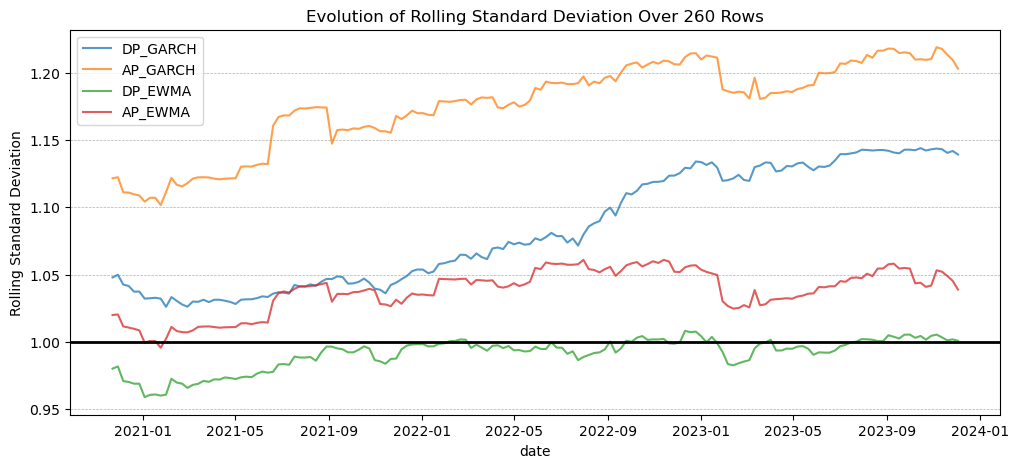

MRAD of DP_GARCH = 0.08
MRAD of AP_GARCH = 0.18
MRAD of DP_EWMA = 0.01
MRAD of AP_EWMA = 0.04
---------------------------------------------------------------------------------------------------------------------------------------


In [132]:
# compute a rolling standard deviation over 260 days
_df_rolling = _df
_df_rolling['DP_GARCH'] = _df['DP_GARCH'].rolling(window=260).std()
_df_rolling['AP_GARCH'] = _df['AP_GARCH'].rolling(window=260).std()
_df_rolling['DP_EWMA'] = _df['DP_EWMA'].rolling(window=260).std()
_df_rolling['AP_EWMA'] = _df['AP_EWMA'].rolling(window=260).std()

# plot the results
plt.figure(figsize=(12, 5))
plt.plot(_df_rolling['DP_GARCH'], label='DP_GARCH', alpha=0.75)
plt.plot(_df_rolling['AP_GARCH'], label='AP_GARCH', alpha=0.75)
plt.plot(_df_rolling['DP_EWMA'], label='DP_EWMA', alpha=0.75)
plt.plot(_df_rolling['AP_EWMA'], label='AP_EWMA', alpha=0.75)

plt.title('Evolution of Rolling Standard Deviation Over 260 Rows')
plt.xlabel('date')
plt.ylabel('Rolling Standard Deviation')
plt.legend()
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
plt.axhline(y=1, color='black', linestyle='-', linewidth=2)
plt.show()

# compute mean rolling absolute deviations
_df_rolling = _df_rolling.dropna()
_df_adj = _df_rolling.copy()
_df_adj.loc[:, 'DP_GARCH'] += -1
_df_adj.loc[:, 'AP_GARCH'] += -1
_df_adj.loc[:, 'DP_EWMA'] += -1
_df_adj.loc[:, 'AP_EWMA'] += -1
M_adj = len(_df_adj)

MRAD_DP_GARCH = round((1/M_adj) * _df_adj['DP_GARCH'].abs().sum(), 2)
MRAD_AP_GARCH = round((1/M_adj) * _df_adj['AP_GARCH'].abs().sum(), 2)
MRAD_DP_EWMA = round((1/M_adj) * _df_adj['DP_EWMA'].abs().sum(), 2)
MRAD_AP_EWMA = round((1/M_adj) * _df_adj['AP_EWMA'].abs().sum(), 2)

print(f'MRAD of DP_GARCH = {MRAD_DP_GARCH}')
print(f'MRAD of AP_GARCH = {MRAD_AP_GARCH}')
print(f'MRAD of DP_EWMA = {MRAD_DP_EWMA}')
print(f'MRAD of AP_EWMA = {MRAD_AP_EWMA}')
print('---------------------------------------------------------------------------------------------------------------------------------------')

## Criterion 3 : distribution

In [133]:
# Compute excess kurtosis of z-scores for each model
DP_GARCH_kur = GARCH_OOS_W["DP_Z"].kurtosis()
AP_GARCH_kur = GARCH_OOS_W["AP_Z"].kurtosis()
DP_EWMA_kur = EWMA_OOS_W['DP_Z'].kurtosis()
AP_EWMA_kur = EWMA_OOS_W['AP_Z'].kurtosis()

# Compute robust skewness of z-scores for each model
DP_GARCH_skew = (_df['DP_GARCH'].mean() - _df['DP_GARCH'].median()) / _df['DP_GARCH'].std()
AP_GARCH_skew = (_df['AP_GARCH'].mean() - _df['AP_GARCH'].median()) / _df['AP_GARCH'].std()
DP_EWMA_skew = (_df['DP_EWMA'].mean() - _df['DP_EWMA'].median()) / _df['DP_EWMA'].std()
AP_EWMA_skew = (_df['AP_EWMA'].mean() - _df['AP_EWMA'].median()) / _df['AP_EWMA'].std()

# create table
Criterion_three = pd.DataFrame({
    'z-scores': ['DP_GARCH', 'AP_GARCH', 'DP_EWMA', 'AP_EWMA'],
    'excess kurtosis': [DP_GARCH_kur, AP_GARCH_kur, DP_EWMA_kur, AP_EWMA_kur],
    'robust skewness': [DP_GARCH_skew, AP_GARCH_skew, DP_EWMA_skew, AP_EWMA_skew],
})
Criterion_three = Criterion_three.set_index(['z-scores']).transpose()
Criterion_three

z-scores,DP_GARCH,AP_GARCH,DP_EWMA,AP_EWMA
excess kurtosis,-0.690702,0.335751,-0.069035,0.209260
robust skewness,0.230037,-0.170635,-0.311095,-0.205539


EWMA has the lowest excess kurtosis by far ;
EWMA has a lowest absolute robust skewness ;
Therefore, both sub-criteria show EWMA is better than GARCH.

## Criterion 4 : relative

In [134]:
# compute quasi-likelihood statistics
df_QL = np.log(GARCH_EWMA_Z_SCORE**2) - (GARCH_EWMA_Z_SCORE**2)
DP_GARCH_QL = df_QL['DP_GARCH'].sum()
AP_GARCH_QL = df_QL['AP_GARCH'].sum()
DP_EWMA_QL = df_QL['DP_EWMA'].sum()
AP_EWMA_QL = df_QL['AP_EWMA'].sum()

Criterion_four = pd.DataFrame({
    'z-scores': ['DP_GARCH', 'AP_GARCH', 'DP_EWMA', 'AP_EWMA'],
    'QL statistic': [DP_GARCH_QL, AP_GARCH_QL, DP_EWMA_QL, AP_EWMA_QL],
})
Criterion_four = Criterion_four.set_index(['z-scores']).transpose()
Criterion_four


z-scores,DP_GARCH,AP_GARCH,DP_EWMA,AP_EWMA
QL statistic,-840.966691,-933.939232,-908.182134,-937.042632


EWMA has the largest sum of Quasi-Likelihood for both portfolios, so it is the best model according to criterion 4. However, values are relatively close, so we need to perform a t-test

In [135]:
# compute the difference between the QL of each model, and the average and standard deviation
df_QL['DP_GARCH_MINUS_EWMA'] = df_QL['DP_GARCH'] - df_QL['DP_EWMA']
df_QL['AP_GARCH_MINUS_EWMA'] = df_QL['AP_GARCH'] - df_QL['AP_EWMA']
QL_mean_DP = df_QL['DP_GARCH_MINUS_EWMA'].mean()
QL_mean_AP = df_QL['AP_GARCH_MINUS_EWMA'].mean()
QL_std_DP = df_QL['DP_GARCH_MINUS_EWMA'].std() / np.sqrt(M)
QL_std_AP = df_QL['AP_GARCH_MINUS_EWMA'].std() / np.sqrt(M)

# compute t-statistics
QL_tstat_DP = QL_mean_DP / QL_std_DP
QL_tstat_AP = QL_mean_AP / QL_std_AP

Criterion_four_updated = pd.DataFrame({
    'z-scores': ['DP GARCH', 'AP GARCH', 'DP EWMA', 'AP EWMA', 'DP GARCH-EWMA', 'AP GARCH-EWMA'],
    'QL statistic': [DP_GARCH_QL, AP_GARCH_QL, DP_EWMA_QL, AP_EWMA_QL, '', ''],
    'average of the difference': ['', '', '', '', QL_mean_DP, QL_mean_AP],
    't-statistic of the difference': ['', '', '', '', QL_tstat_DP, QL_tstat_AP],
})
Criterion_four_updated = Criterion_four_updated.set_index(['z-scores']).transpose()
Criterion_four_updated

z-scores,DP GARCH,AP GARCH,DP EWMA,AP EWMA,DP GARCH-EWMA,AP GARCH-EWMA
QL statistic,-840.966691,-933.939232,-908.182134,-937.042632,,
average of the difference,,,,,0.160802,0.007424
t-statistic of the difference,,,,,4.193712,0.181181


 The t-stat of is way smaller than -2 (under 95% confidence, p = 5%) and has p < 0. 001% for both portfolios,
 EWMA is better than GARCH

# Ex-ante risk evaluation

To evaluate the ex-ante risk of our portfolio, we decided to calcule the below metrics:

- Volatility: It is the standard deviation or square root of variance of portfolio returns. It measures the amplitude of returns movements. Higher volatility implies a greater potential for large price swings, which can lead to larger gains but also larger losses.It can also help manage downside risk by defining the size of position limits based on the expected volatility

- VaR with a 99% confidence interval: it will allow us to compute, given 99% confidence, what is the maximum amount we can loose over one day. Then by normalizing the data, we can know, given 99% confidence, what is the maximum we can loose over one week (the period during which the new positions are implemented).

- ES: Expected shotfall will allow us to complete the above measure by answering the question: ”what is the average loss if the VaR is exceeded ?”.

- Risk decomposition:It will allow us to slice and dice total portfolio risk along components and answer the following questions: what is contribution of component i to diversified portfolio risk ? what is the impact of marginal portfolio change on portfolio risk ?

- Sharpe Ratio: It provides a measure of the risk-adjusted performance of the portfolio.It will help us identify whether the portfolio is providing sufficient excess return for the level of risk taken.

In conclusion, we decide to use EWMA to estimate volatility.

### Parametric VaR & ES

In order to calculate parametric VaR and ES, we need to use these 2 formulas:

 $ VaR_{t+1}(c) = N^{-1}(c) * σ_{t+1} $

 $ ES_{t+1}(c) = n(N^{-1}(c))/(1-c) * σ_{t+1} $

We assume that the returns follow normal distribution.

*   Firstly, I chose a lookback window to be the same as out of sample data , so the start date of this window is 2015-12-01 and close date of this window is 2023/11/30. I still used λ=0.94 for EWMA parameter.(Feel free to check the excel sheet "Lambda for VaR & ES").

*   Secondly, I used λ=0.94 to compute EWMA volatiltity and average over the lookback window and plug the averaged volatilty to VaR & ES formula above.

Default portfolio

In [136]:
start_date_of_lookback_window = '2015-12-01'
close_date_of_lookback_window = '2023-11-30'

start_index = Portfolio_Value_Witouht_NA.index.get_loc(start_date_of_lookback_window)
Portofolio_Value_over_lookback = Portfolio_Value_Witouht_NA.iloc[start_index:]

λ = 0.94

EWMA_variances_default=[] #I create an empty list to stock all the variances values

EWMA_variances_default.append(Portofolio_Value_over_lookback['Default Portfolio Returns^2'].iloc[0]) #We set the first variance of the list as r^2 of the first date

for i in range(1,len(Portofolio_Value_over_lookback['Default Portfolio Returns^2'])): #EWMA model formula for all the dates and we stock the values in the list created above
    EWMA_variances_default.append((1 - λ) * Portofolio_Value_over_lookback['Default Portfolio Returns^2'].iloc[i-1]+ (λ) * EWMA_variances_default[i-1])

EWMA_vol_Default_Portfolio=np.sqrt(EWMA_variances_default) # We compute the volatilities

#I create an empty dataframe to stock all the volatilities for the lookback window
EWMA_vol_over_lookback = pd.DataFrame(index=Portofolio_Value_over_lookback.index)
EWMA_vol_over_lookback['Vol Default Portfolio'] = EWMA_vol_Default_Portfolio # We stock them in the dataframe

Augmented portfolio

In [137]:
EWMA_variances_Augmented=[] #I create an empty list to stock all the variances values

EWMA_variances_Augmented.append(Portofolio_Value_over_lookback['Augmented Portfolio Returns^2'].iloc[0]) #We set the first variance of the list as r^2 of the first date

for i in range(1,len(Portofolio_Value_over_lookback['Augmented Portfolio Returns^2'])): #EWMA model formula for all the dates and we stock the values in the list created above
    EWMA_variances_Augmented.append((1 - λ) * Portofolio_Value_over_lookback['Augmented Portfolio Returns^2'].iloc[i-1]+ (λ) * EWMA_variances_Augmented[i-1])

EWMA_vol_Augmented_Portfolio=np.sqrt(EWMA_variances_Augmented) # We compute the volatilities
EWMA_vol_over_lookback['Vol Augmented Portfolio'] = EWMA_vol_Augmented_Portfolio # We stock them in the dataframe

I compute the mean of volatility over the lookback window

Remark : we have obtain a daily volatility here

In [138]:
Mean_Volatility_over_lookback = EWMA_vol_over_lookback.mean()
Mean_Volatility_over_lookback

Vol Default Portfolio      0.021822
Vol Augmented Portfolio    0.014137
dtype: float64

We compute VaR as of t+1 (t+1 day ; if we want a weekly/monthly estimation we shall multiply by $ p^{1/2} $)

In [139]:
from scipy.stats import norm

# If we use 95% as confidential level
# Default portfolio:
Parametric_VaR_Default_95 = norm.ppf(0.95) * Mean_Volatility_over_lookback.iloc[0]
Parametric_VaR_Default_95 = "{:.2f}%".format(Parametric_VaR_Default_95 * 100)
# Augmented portfolio:
Parametric_VaR_Augmented_95 = norm.ppf(0.95) * Mean_Volatility_over_lookback.iloc[1]
Parametric_VaR_Augmented_95 = "{:.2f}%".format(Parametric_VaR_Augmented_95 * 100)
# If we use 99% as confidential level
# Default portfolio:
Parametric_VaR_Default_99 = norm.ppf(0.99) * Mean_Volatility_over_lookback.iloc[0]
Parametric_VaR_Default_99 = "{:.2f}%".format(Parametric_VaR_Default_99 * 100)
# Augmented portfolio:
Parametric_VaR_Augmented_99 = norm.ppf(0.99) * Mean_Volatility_over_lookback.iloc[1]
Parametric_VaR_Augmented_99 = "{:.2f}%".format(Parametric_VaR_Augmented_99 * 100)

In [140]:
# create table
VaR = pd.DataFrame({
    'Var': ['Default 95%', 'Augmented 95%', 'Default 99%', 'Augmented 99%'],
    'VaR': [Parametric_VaR_Default_95, Parametric_VaR_Augmented_95, Parametric_VaR_Default_99, Parametric_VaR_Augmented_99],
})
VaR = VaR.set_index(['Var']).transpose()
VaR

Var,Default 95%,Augmented 95%,Default 99%,Augmented 99%
VaR,3.59%,2.33%,5.08%,3.29%


We compute ES as of t+1 (t + 1 day)

In [141]:
# If we use 95% as confidential level
# Default portfolio:
Parametric_ES_Default_95 = norm.pdf(norm.ppf(0.95))/(1-0.95) * Mean_Volatility_over_lookback.iloc[0]
Parametric_ES_Default_95 = "{:.2f}%".format(Parametric_ES_Default_95 * 100)
# Augmented portfolio:
Parametric_ES_Augmented_95 = norm.pdf(norm.ppf(0.95))/(1-0.95) * Mean_Volatility_over_lookback.iloc[1]
Parametric_ES_Augmented_95 = "{:.2f}%".format(Parametric_ES_Augmented_95 * 100)
# If we use 99% as confidential level
# Default portfolio:
Parametric_ES_Default_99 = norm.pdf(norm.ppf(0.99))/(1-0.99) * Mean_Volatility_over_lookback.iloc[0]
Parametric_ES_Default_99 = "{:.2f}%".format(Parametric_ES_Default_99 * 100)
# Augmented portfolio:
Parametric_ES_Augmented_99 = norm.pdf(norm.ppf(0.99))/(1-0.99) * Mean_Volatility_over_lookback.iloc[1]
Parametric_ES_Augmented_99 = "{:.2f}%".format(Parametric_ES_Augmented_99 * 100)

In [142]:
# create table
ES = pd.DataFrame({
    'Es': ['Default 95%', 'Augmented 95%', 'Default 99%', 'Augmented 99%'],
    'ES': [Parametric_ES_Default_95, Parametric_ES_Augmented_95, Parametric_ES_Default_99, Parametric_ES_Augmented_99],
})
ES = ES.set_index(['Es']).transpose()
ES

Es,Default 95%,Augmented 95%,Default 99%,Augmented 99%
ES,4.50%,2.92%,5.82%,3.77%


### Non - parametric VaR & ES

#### Historical Simulation

VaR

Default portfolio

In [143]:
# Rank the returns from lowest to highest
ranked_returns = Portofolio_Value_over_lookback['Default Portfolio Returns'].sort_values()

# Select the 5th percentile return
percentile_index = int(0.05 * len(ranked_returns))
fifth_percentile_var_D = - ranked_returns.iloc[percentile_index]
fifth_percentile_var_D = "{:.2f}%".format(fifth_percentile_var_D * 100)

# Select the 1th percentile return
percentile_index = int(0.01 * len(ranked_returns))
first_percentile_var_D = - ranked_returns.iloc[percentile_index]
first_percentile_var_D = "{:.2f}%".format(first_percentile_var_D * 100)

Augmented portfolio

In [144]:
# Rank the returns from lowest to highest
ranked_returns = Portofolio_Value_over_lookback['Augmented Portfolio Returns'].sort_values()

# Select the 5th percentile return
percentile_index = int(0.05 * len(ranked_returns))
fifth_percentile_var_A = - ranked_returns.iloc[percentile_index]
fifth_percentile_var_A = "{:.2f}%".format(fifth_percentile_var_A * 100)

# Select the 1th percentile return
percentile_index = int(0.01 * len(ranked_returns))
first_percentile_var_A = - ranked_returns.iloc[percentile_index]
first_percentile_var_A = "{:.2f}%".format(first_percentile_var_A * 100)

ES

Default portfolio

In [145]:
# Rank the returns from lowest to highest
ranked_returns = Portofolio_Value_over_lookback['Default Portfolio Returns'].sort_values()

# Select the 5th percentile return
percentile_index = int(0.05 * len(ranked_returns))
fifth_percentile_ES_D = - ranked_returns.iloc[:percentile_index].mean()
fifth_percentile_ES_D = "{:.2f}%".format(fifth_percentile_ES_D * 100)

# Select the 1th percentile return
percentile_index = int(0.01 * len(ranked_returns))
first_percentile_ES_D = - ranked_returns.iloc[:percentile_index].mean()
first_percentile_ES_D = "{:.2f}%".format(first_percentile_ES_D * 100)

Augmented portfolio

In [146]:
# Rank the returns from lowest to highest
ranked_returns = Portofolio_Value_over_lookback['Augmented Portfolio Returns'].sort_values()

# Select the 5th percentile return
percentile_index = int(0.05 * len(ranked_returns))
fifth_percentile_ES_A = - ranked_returns.iloc[:percentile_index].mean()
fifth_percentile_ES_A = "{:.2f}%".format(fifth_percentile_ES_A * 100)

# Select the 1th percentile return
percentile_index = int(0.01 * len(ranked_returns))
first_percentile_ES_A = - ranked_returns.iloc[:percentile_index].mean()
first_percentile_ES_A = "{:.2f}%".format(first_percentile_ES_A * 100)

Let's make a table:

In [147]:
var_es = pd.DataFrame({
    'VaR & ES': ['Default 95%', 'Augmented 95%', 'Default 99%', 'Augmented 99%'],
    'VAR': [fifth_percentile_var_D, fifth_percentile_var_A, first_percentile_var_D, first_percentile_var_A],
    'ES': [fifth_percentile_ES_D, fifth_percentile_ES_A, first_percentile_ES_D, first_percentile_ES_A],
})
var_es = var_es.set_index(['VaR & ES']).transpose()
var_es

VaR & ES,Default 95%,Augmented 95%,Default 99%,Augmented 99%
VAR,3.80%,2.46%,6.76%,4.80%
ES,6.06%,4.06%,10.82%,7.53%


Parametric VaR very close to HSim VaR, so 5% quantiles of normal & empirical distributions ~agree.
HSim ES > normal ES, so beyond the 5% quantile the empirical distribution seems to have somewhat fatter tails.

#### Filtered HSim

Normalize each return with its forecasted vola into z-scores

In [148]:
Z_scores_D = Portofolio_Value_over_lookback['Default Portfolio Returns']/EWMA_vol_over_lookback['Vol Default Portfolio']
Z_scores_A = Portofolio_Value_over_lookback['Augmented Portfolio Returns']/EWMA_vol_over_lookback['Vol Augmented Portfolio']

Multiply z-scores with most recent (t+1) vola to get rescaled returns. These rescaled returns reflect tomorrow’s (t+1) forecasted vola level

In [149]:
# Firstly, we need to add the forecasted conditional variance of t+1(2023/12/01) to estimated volatilities
EWMA_tplus1_D = EWMA_vol_over_lookback['Vol Default Portfolio'].values.tolist()
EWMA_tplus1_D.append((1 - λ) * Portofolio_Value_over_lookback['Default Portfolio Returns^2'].iloc[-1]+ (λ) * EWMA_variances_default[-1])

EWMA_tplus1_A = EWMA_vol_over_lookback['Vol Augmented Portfolio'].values.tolist()
EWMA_tplus1_A.append((1 - λ) * Portofolio_Value_over_lookback['Augmented Portfolio Returns^2'].iloc[-1]+ (λ) * EWMA_variances_Augmented[-1])

# Multiply z-scores with most recent vola to get rescaled returns
Rescaled_returns_D = Z_scores_D * EWMA_tplus1_D[1:]
Rescaled_returns_A = Z_scores_A * EWMA_tplus1_A[1:]

Rank rescaled returns to get VaR

Default portfolio

In [150]:
# Rank the returns from lowest to highest
ranked_returns = Rescaled_returns_D.sort_values()

# Select the 5th percentile return
percentile_index = int(0.05 * len(ranked_returns))
fifth_percentile_var_D = - ranked_returns.iloc[percentile_index]
fifth_percentile_var_D = "{:.2f}%".format(fifth_percentile_var_D * 100)

# Select the 1th percentile return
percentile_index = int(0.01 * len(ranked_returns))
first_percentile_var_D = - ranked_returns.iloc[percentile_index]
first_percentile_var_D = "{:.2f}%".format(first_percentile_var_D * 100)

Augmented portfolio

In [151]:
# Rank the returns from lowest to highest
ranked_returns = Rescaled_returns_A.sort_values()

# Select the 5th percentile return
percentile_index = int(0.05 * len(ranked_returns))
fifth_percentile_var_A = - ranked_returns.iloc[percentile_index]
fifth_percentile_var_A = "{:.2f}%".format(fifth_percentile_var_A * 100)

# Select the 1th percentile return
percentile_index = int(0.01 * len(ranked_returns))
first_percentile_var_A = - ranked_returns.iloc[percentile_index]
first_percentile_var_A = "{:.2f}%".format(first_percentile_var_A * 100)

Rank rescaled returns to get ES

Default portfolio

In [152]:
# Rank the returns from lowest to highest
ranked_returns = Rescaled_returns_D.sort_values()

# Select the 5th percentile return
percentile_index = int(0.05 * len(ranked_returns))
fifth_percentile_ES_D = - ranked_returns.iloc[:percentile_index].mean()
fifth_percentile_ES_D = "{:.2f}%".format(fifth_percentile_ES_D * 100)

# Select the 1th percentile return
percentile_index = int(0.01 * len(ranked_returns))
first_percentile_ES_D = - ranked_returns.iloc[:percentile_index].mean()
first_percentile_ES_D = "{:.2f}%".format(first_percentile_ES_D * 100)

Augmented portfolio

In [153]:
# Rank the returns from lowest to highest
ranked_returns = Rescaled_returns_A.sort_values()

# Select the 5th percentile return
percentile_index = int(0.05 * len(ranked_returns))
fifth_percentile_ES_A = - ranked_returns.iloc[:percentile_index].mean()
fifth_percentile_ES_A = "{:.2f}%".format(fifth_percentile_ES_A * 100)

# Select the 1th percentile return
percentile_index = int(0.01 * len(ranked_returns))
first_percentile_ES_A = - ranked_returns.iloc[:percentile_index].mean()
first_percentile_ES_A = "{:.2f}%".format(first_percentile_ES_A * 100)

Let's make a table

In [154]:
var_es_filtered = pd.DataFrame({
    'VaR & ES': ['Default 95%', 'Augmented 95%', 'Default 99%', 'Augmented 99%'],
    'VAR': [fifth_percentile_var_D, fifth_percentile_var_A, first_percentile_var_D, first_percentile_var_A],
    'ES': [fifth_percentile_ES_D, fifth_percentile_ES_A, first_percentile_ES_D, first_percentile_ES_A],
})
var_es_filtered = var_es_filtered.set_index(['VaR & ES']).transpose()
var_es_filtered

VaR & ES,Default 95%,Augmented 95%,Default 99%,Augmented 99%
VAR,4.02%,2.54%,7.40%,5.13%
ES,6.75%,4.52%,12.39%,8.71%


## Maximum drawdown

In order to compue the maximum drawdown we could use a monte carlo method ? example below
$$ $$
Or only compute the historical maximum drawdown (example 2)

Condider return are normallly distributed :
$$
R_t ~ N(mu,sigma_{t}^2)
$$

-> Model sigma with EWMA(lambda)
-> simulate returns using norm.rvs
-> compute the maximum drawdown over the simulation
-> compute the mean of the results obtained

In [155]:
# model_returns.shape[0] = model_returns['DP_var'].iloc[i-1] + (model_returns['DP'].iloc[i-1])**2

Problem : very long to process migth launch it overnigth. WARNING : I(thomas) changed the cell below to markdown in the meantime.

#Example 1
M = 10**5
n = data.shape[0]-1
#returns construction
#processing the data, including asset returns in the same df as porfolio returns
rectified_df = data.copy()
rectified_df["Oil"] = data["Oil"] / data["Oil"].iloc[0]  # Oil was not formatted the same as other assets

asset_returns = rectified_df.copy()
for asset in rectified_df.columns:
    asset_returns[f'{asset}'] = rectified_df[asset].pct_change()

total_returns = asset_returns.copy().dropna()
total_returns["DP"] = 0.5 * asset_returns["Mkt"] + 0.2 * asset_returns["Tsies"] + 0.05 * asset_returns["CorpIG"] + 0.05 * asset_returns["CorpHY"] + 0.15 * asset_returns["AR"] + 0.05 * asset_returns["Oil"]
total_returns["AP"] = 0.4 * asset_returns["Mkt"] + 0.35 * asset_returns["Tsies"] + 0.25 * asset_returns["AR"]

#Maximum drawdown

λ = 0.89
model_returns = total_returns.copy()

#Default portfolio
model_returns['DP'] = total_returns['DP']
model_returns['DP_var'] = total_returns['DP']**2
mu_DP = total_returns["DP"].mean() #Mean return for the returns distribution
#Augmented portfolio
model_returns['AP'] = total_returns['AP']
model_returns['AP_var'] = total_returns['AP']**2
mu_AP = total_returns["AP"].mean() #Mean returns for the returns distribution
res_DP = []
res_AP = []
for j in range(M) :
    print(j)
    Z = norm.rvs(size = n-1)
    for i in range(1,n) :
        #DP
        model_returns['DP_var'].iloc[i] = model_returns['DP_var'].iloc[i-1] + (model_returns['DP'].iloc[i-1])**2 #Compute sigma(t)
        model_returns['DP'].iloc[i] = mu_DP + np.sqrt(model_returns['DP_var'].iloc[i]) * Z[i-1] #comùpute r_t = mu + N(0,1) * sigma(t)
        #AP
        model_returns['AP_var'].iloc[i] = model_returns['AP_var'].iloc[i-1] + (model_returns['AP'].iloc[i-1])**2
        model_returns['AP'].iloc[i] = mu_DP + np.sqrt(model_returns['AP_var'].iloc[i]) * Z[i-1]

    #Compute portofolios value
    model_returns['DP_Value'] = (1 + model_returns['DP']).cumprod() * 100
    model_returns['AP_Value'] = (1 + model_returns['AP']).cumprod() * 100
    # Find maximum drawdowns
    model_returns['DP_peak'] = model_returns['DP_Value'].cummax()
    model_returns['DP_drawdown'] = (model_returns['DP_Value'] - model_returns['DP_peak']) / model_returns['DP_peak']
    DP_max_drawdown = model_returns['DP_drawdown'].min()

    model_returns['AP_peak'] = model_returns['AP_Value'].cummax()
    model_returns['AP_drawdown'] = (model_returns['AP_Value'] - model_returns['AP_peak']) / model_returns['AP_peak']
    AP_max_drawdown = model_returns['AP_drawdown'].min()

    #Save the result in the lists
    res_DP.append(DP_max_drawdown)
    res_AP.append(AP_max_drawdown)

DP_max_drawdown = np.mean(res_DP)
AP_max_drawdown = np.mean(res_AP)

print(f"Maximum Drawdown of default portfolio: {DP_max_drawdown * 100:.2f}%")
print(f"Maximum Drawdown of augmented portfolio: {AP_max_drawdown * 100:.2f}%")


In [156]:
# Example 2 : historical maximum drawdown

# processing the data, including asset returns in the same df as porfolio returns
rectified_df = data.copy()
rectified_df["Oil"] = data["Oil"] / data["Oil"].iloc[0]  # Oil was not formatted the same as other assets

asset_returns = rectified_df.copy()
for asset in rectified_df.columns:
    asset_returns[f'{asset}'] = rectified_df[asset].pct_change(5)

total_returns = asset_returns.copy()
total_returns["DP"] = 0.5 * asset_returns["Mkt"] + 0.2 * asset_returns["Tsies"] + 0.05 * asset_returns["CorpIG"] + 0.05 * asset_returns["CorpHY"] + 0.15 * asset_returns["AR"] + 0.05 * asset_returns["Oil"]
total_returns["AP"] = 0.4 * asset_returns["Mkt"] + 0.35 * asset_returns["Tsies"] + 0.25 * asset_returns["AR"]

# Maximum drawdown

model_returns = total_returns.copy()

# Default portfolio
model_returns['DP'] = total_returns['DP']
model_returns['DP_cum'] = (1 + model_returns['DP']).cumprod()
# Augmented portfolio
model_returns['AP'] = total_returns['AP']
model_returns['AP_cum'] = (1 + model_returns['AP']).cumprod()


# Convert cumulative returns to a cumulative wealth index
base_value = 100
model_returns['DP_cum_index'] = base_value * model_returns['DP_cum']
model_returns['AP_cum_index'] = base_value * model_returns['AP_cum']

# Find maximum drawdowns
model_returns['DP_peak'] = model_returns['DP_cum_index'].cummax()
model_returns['DP_drawdown'] = (model_returns['DP_cum_index'] - model_returns['DP_peak']) / model_returns['DP_peak']
DP_max_drawdown = model_returns['DP_drawdown'].min()

model_returns['AP_peak'] = model_returns['AP_cum_index'].cummax()
model_returns['AP_drawdown'] = (model_returns['AP_cum_index'] - model_returns['AP_peak']) / model_returns['AP_peak']
AP_max_drawdown = model_returns['AP_drawdown'].min()

print(f"Maximum Drawdown of default portfolio: {DP_max_drawdown * 100:.2f}%")
print(f"Maximum Drawdown of augmented portfolio: {AP_max_drawdown * 100:.2f}%")

# EWMA_vol_over_260_days

Maximum Drawdown of default portfolio: -84.56%
Maximum Drawdown of augmented portfolio: -68.49%


## Risk decomposition

### A. Slicing and dicing volatility

#### For default portfolio:

Firstly, we compute the β with formula  $ r_{i} = α_{i} + β_{ip}r_{p} + ε_{i}
$ for each component(asset class) in the portfolio.

In [157]:
# processing the data, including asset returns in the same df as porfolio returns
rectified_df = data.copy()
rectified_df["Oil"] = data["Oil"] / data["Oil"].iloc[0]  # Oil was not formatted the same as other assets

asset_returns = rectified_df.copy()
for asset in rectified_df.columns:
    asset_returns[f'{asset}'] = rectified_df[asset].pct_change(5)

asset_returns = asset_returns.dropna().resample("W").last()

total_returns = asset_returns.copy()
total_returns["DP"] = 0.5 * asset_returns["Mkt"] + 0.2 * asset_returns["Tsies"] + 0.05 * asset_returns["CorpIG"] + 0.05 * asset_returns["CorpHY"] + 0.15 * asset_returns["AR"] + 0.05 * asset_returns["Oil"]
total_returns["AP"] = 0.4 * asset_returns["Mkt"] + 0.35 * asset_returns["Tsies"] + 0.25 * asset_returns["AR"]

In [158]:
import statsmodels.api as sm

# Create an empty dictionary to store slopes
slopes_D = []
x = total_returns['DP']
# Loop through each y column
for i in range(6):
    # Add a constant term for the intercept
    y = total_returns.iloc[:, i]
    x = sm.add_constant(x)

    # Fit the OLS model
    results = sm.OLS(y, x).fit()

    # Extract the slope
    slope = results.params['DP']

    # Store the slope in the dictionary
    slopes_D.append(slope)

# Print the slopes
for i, slope in enumerate(slopes_D):
    print(f"Slope between DP and {total_returns.columns[i]}: {slope}")

Slope between DP and Mkt: 1.7698605839130956
Slope between DP and Tsies: -0.04009952219628276
Slope between DP and CorpIG: 0.1751501046971498
Slope between DP and CorpHY: 0.4832350274873376
Slope between DP and AR: -0.0058057857771507335
Slope between DP and Oil: 1.8208244748011277


Secondly, we compute volatility for each asset class(columns 0-5) and the portfolio(column 6).

In [159]:
volatilities_D = []
for i in range(7):
  volatility = total_returns.iloc[:, i].std()
  volatilities_D.append(volatility)

Next step: we compute covariance between asset i and portfolio p

In [160]:
cov_ip = []
for i in range(6):
  cov_ip.append(slopes_D[i] * (volatilities_D[6]**2))

Marginal contribution:

In [161]:
mc_i = []
for i in range(6):
  mc_i.append(cov_ip[i] / volatilities_D[6])

mc_i.append(sum(mc_i))

Component contribution:

In [162]:
weights_D = [0.5, 0.2, 0.05, 0.05, 0.15, 0.05]
cc_i = []
proportion = []
for i in range(6):
  cc_i.append(mc_i[i] * weights_D[i])
  proportion.append(cc_i[i]/volatilities_D[6])

cc_i.append(sum(cc_i))
proportion.append(sum(proportion))

Let's make a table

In [163]:
vol_decomposition = pd.DataFrame({
    'asset': ['Mkt', 'Tsies', 'CorpIG', 'CorpHY', 'AR', 'Oil', 'sum'],
    'Mariginal Contribution': [mc_i[i] for i in range(7)],
    'Component contribution': [cc_i[i] for i in range(7)],
    'Proportion': [proportion[i] for i in range(7)],
})
vol_decomposition

,asset,Mariginal Contribution,Component contribution,Proportion
0,Mkt,0.023542,0.011771,0.884930
1,Tsies,-0.000533,-0.000107,-0.008020
2,CorpIG,0.002330,0.000116,0.008758
3,CorpHY,0.006428,0.000321,0.024162
4,AR,-0.000077,-0.000012,-0.000871
5,Oil,0.024220,0.001211,0.091041
6,sum,0.055909,0.013302,1.000000


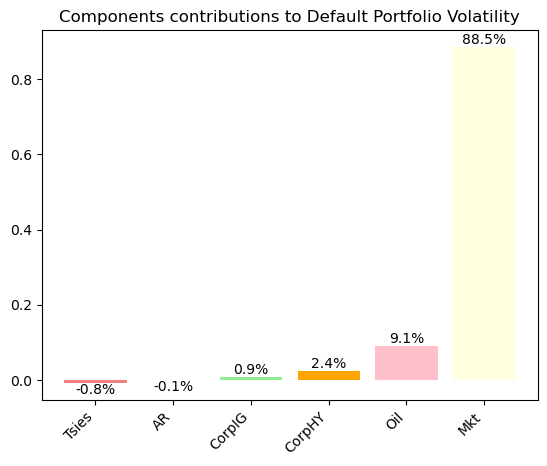

In [164]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming that 'vol_decomposition' DataFrame is defined

# Filter out the "sum" asset
vol_decomposition_filtered = vol_decomposition[vol_decomposition['asset'] != 'sum']

# Sort the filtered DataFrame by 'Proportion'
vol_decomposition_sorted = vol_decomposition_filtered.sort_values(by='Proportion')

# Extract relevant columns from the sorted DataFrame
labels = vol_decomposition_sorted['asset']
proportions = vol_decomposition_sorted['Proportion']

# Create a vertical bar chart
fig, ax = plt.subplots()
bars = ax.bar(labels, proportions, color=['lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'pink', 'lightyellow', 'lightgrey'])

# Add data values to the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1%}', va='bottom' if yval > 0 else 'top', ha='center')

# Add a title
plt.title('Components contributions to Default Portfolio Volatility')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the bar chart
plt.show()

#### For Augmented portfolio:

In [165]:
# Create an empty dictionary to store slopes
asset_column = [0, 1, 4]
slopes_A = []
x = total_returns['AP']
# Loop through each y column
for i in asset_column:
    # Add a constant term for the intercept
    y = total_returns.iloc[:, i]
    x = sm.add_constant(x)

    # Fit the OLS model
    results = sm.OLS(y, x).fit()

    # Extract the slope
    slope = results.params['AP']

    # Store the slope in the dictionary
    slopes_A.append(slope)

# Print the slopes
for slope in slopes_A:
    print(slope)

2.0210972200307187
0.15182793728834892
0.553685335747165


In [166]:
column_number = [0,1,4,7] # I include assets "mkt, tsies, AR" and portfolio "AP".
volatilities_A = []
for i in column_number:
  volatility = total_returns.iloc[:, i].std()
  volatilities_A.append(volatility)

In [167]:
cov_ip_A = []
for i in range(3):
  cov_ip_A.append(slopes_A[i] * (volatilities_A[3]**2))

In [168]:
mc_i_A = []
for i in range(3):
  mc_i_A.append(cov_ip_A[i] / volatilities_A[3])

mc_i_A.append(sum(mc_i_A))

In [169]:
weights_A = [0.4, 0.35, 0.25]
cc_i_A = []
proportion_A = []
for i in range(3):
  cc_i_A.append(mc_i_A[i] * weights_A[i])
  proportion_A.append(cc_i_A[i]/volatilities_A[3])

cc_i_A.append(sum(cc_i_A))
proportion_A.append(sum(proportion_A))

In [170]:
vol_decomposition_A = pd.DataFrame({
    'asset': ['Mkt', 'Tsies', 'AR', 'sum'],
    'Mariginal Contribution': [mc_i_A[i] for i in range(4)],
    'Component contribution': [cc_i_A[i] for i in range(4)],
    'Proportion': [proportion_A[i] for i in range(4)],
})
vol_decomposition_A

,asset,Mariginal Contribution,Component contribution,Proportion
0,Mkt,0.020282,0.008113,0.808439
1,Tsies,0.001524,0.000533,0.053140
2,AR,0.005556,0.001389,0.138421
3,sum,0.027362,0.010035,1.000000


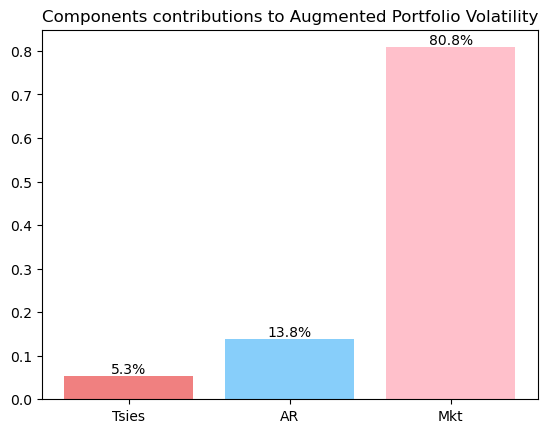

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter out the "sum" asset
vol_decomposition_A_filtered = vol_decomposition_A[vol_decomposition_A['asset'] != 'sum']

# Sort the filtered DataFrame by 'Proportion'
vol_decomposition_A_sorted = vol_decomposition_A_filtered.sort_values(by='Proportion')

# Extract relevant columns from the sorted DataFrame
labels_A = vol_decomposition_A_sorted['asset']
proportions_A = vol_decomposition_A_sorted['Proportion']

# Create a vertical bar chart
fig, ax = plt.subplots()
bars_A = ax.bar(labels_A, proportions_A, color=['lightcoral', 'lightskyblue', 'pink', 'lightgrey'])

# Add data values to the bars
for bar_A in bars_A:
    yval_A = bar_A.get_height()
    plt.text(bar_A.get_x() + bar_A.get_width()/2, yval_A, f'{yval_A:.1%}', va='bottom' if yval_A > 0 else 'top', ha='center')

# Add a title
plt.title('Components contributions to Augmented Portfolio Volatility')

# Show the bar chart
plt.show()

### B. Focus on loss

#### Component loss:
$CL_{ip} = w_{i}β_{ip}L_{p}$

#### For default portfolio:

I chose a loss level of -5%

In [172]:
L = -0.05
CL_D = []
for i in range(6):
  CL_D.append(round(weights_D[i] * slopes_D[i] * L, 4))

CL_D.append(sum(CL_D))

proportion_loss_D = []
for i in range(6):
  proportion_loss_D.append(CL_D[i]/CL_D[6])

proportion_loss_D.append(sum(proportion_loss_D))

In [173]:
component_loss_D = pd.DataFrame({
    'asset': ['Mkt', 'Tsies', 'CorpIG', 'CorpHY', 'AR', 'Oil', 'sum'],
    'Component loss': [CL_D[i] for i in range(7)],
    '%loss contribution': [proportion_loss_D[i] for i in range(7)],
})
component_loss_D

,asset,Component loss,%loss contribution
0,Mkt,-0.0442,0.884
1,Tsies,0.0004,-0.008
2,CorpIG,-0.0004,0.008
3,CorpHY,-0.0012,0.024
4,AR,0.0000,-0.000
5,Oil,-0.0046,0.092
6,sum,-0.0500,1.000


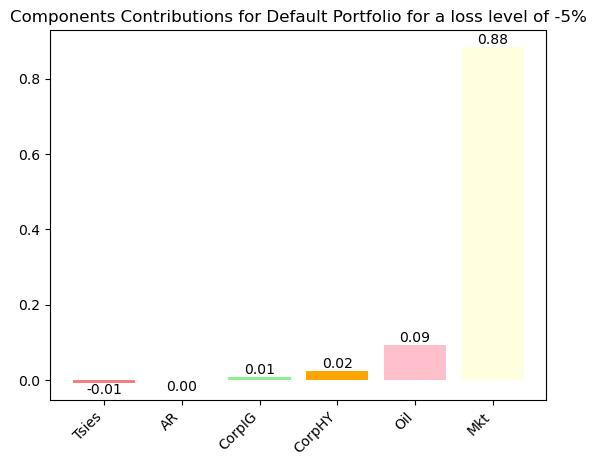

In [174]:
# Filter out the "sum" asset
component_loss_D_filtered = component_loss_D[component_loss_D['asset'] != 'sum']

# Sort the filtered DataFrame by '%loss contribution'
component_loss_D_sorted = component_loss_D_filtered.sort_values(by='%loss contribution')

# Extract relevant columns from the sorted DataFrame
labels_D = component_loss_D_sorted['asset']
loss_values_D = component_loss_D_sorted['%loss contribution']

# Create a vertical bar chart
fig, ax = plt.subplots()
bars_D = ax.bar(labels_D, loss_values_D, color=['lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'pink', 'lightyellow', 'lightgrey'])

# Add data values to the bars
for bar_D in bars_D:
    yval_D = bar_D.get_height()
    plt.text(bar_D.get_x() + bar_D.get_width()/2, yval_D, f'{yval_D:.2f}', va='bottom' if yval_D > 0 else 'top', ha='center')

# Add a title
plt.title('Components Contributions for Default Portfolio for a loss level of -5%')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the bar chart
plt.show()

#### For augmented portfolio:

In [175]:
L = -0.05
CL_A = []

for i in range(3):
  CL_A.append(round(weights_A[i] * slopes_A[i] * L, 4))

CL_A.append(sum(CL_A))

proportion_loss_A = []
for i in range(3):
  proportion_loss_A.append(CL_A[i]/CL_A[3])

proportion_loss_A.append(sum(proportion_loss_A))

In [176]:
component_loss_A = pd.DataFrame({
    'asset': ['Mkt', 'Tsies', 'AR', 'sum'],
    'Component loss': [CL_A[i] for i in range(4)],
    '%loss contribution': [proportion_loss_A[i] for i in range(4)],
})
component_loss_A

,asset,Component loss,%loss contribution
0,Mkt,-0.0404,0.808
1,Tsies,-0.0027,0.054
2,AR,-0.0069,0.138
3,sum,-0.0500,1.000


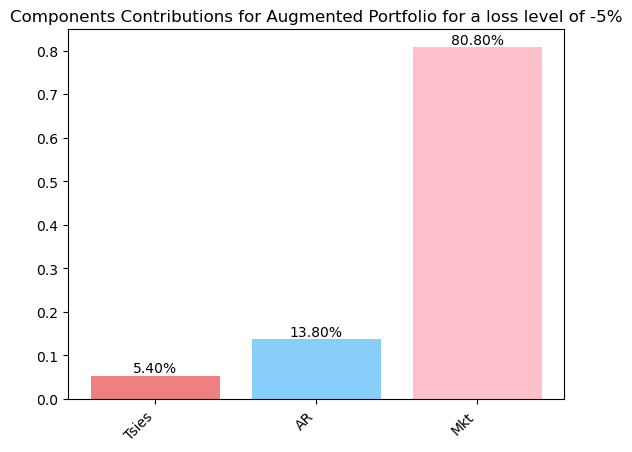

In [177]:
# Filter out the "sum" asset
component_loss_A_filtered = component_loss_A[component_loss_A['asset'] != 'sum']

# Sort the filtered DataFrame by '%loss contribution'
component_loss_A_sorted = component_loss_A_filtered.sort_values(by='%loss contribution')

# Extract relevant columns from the sorted DataFrame
labels_A = component_loss_A_sorted['asset']
loss_percentages_A = component_loss_A_sorted['%loss contribution']

# Create a vertical bar chart
fig, ax = plt.subplots()
bars_A = ax.bar(labels_A, loss_percentages_A, color=['lightcoral', 'lightskyblue', 'pink', 'lightgrey'])

# Add data values to the bars
for bar_A in bars_A:
    yval_A = bar_A.get_height()
    plt.text(bar_A.get_x() + bar_A.get_width()/2, yval_A, f'{yval_A:.2%}', va='bottom' if yval_A > 0 else 'top', ha='center')

# Add a title
plt.title('Components Contributions for Augmented Portfolio for a loss level of -5%')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the bar chart
plt.show()

### C. Decomposing VaR

Daily 95% VaR

For default portfolio:

In [178]:
Z_VaR = norm.ppf(0.95)
Z_VaR

1.6448536269514722

In [179]:
portfolio_var_D = Z_VaR * volatilities_D[-1]
mariginal_var_D = slopes_D * np.array(portfolio_var_D)
component_var_D = mariginal_var_D * weights_D
proportion_var_D = component_var_D / np.sum(component_var_D)
proportion_var_D = np.append(proportion_var_D, np.sum(proportion_var_D))

mariginal_var_D = np.append(mariginal_var_D, np.sum(mariginal_var_D))
component_var_D = np.append(component_var_D, np.sum(component_var_D))

In [180]:
var_decomposition_D = pd.DataFrame({
    'asset': ['Mkt', 'Tsies', 'CorpIG', 'CorpHY', 'AR', 'Oil','sum'],
    'Marginal VaR': [mariginal_var_D[i] for i in range(7)],
    'Component VaR': [component_var_D[i] for i in range(7)],
    '%VaR contribution': [proportion_var_D[i] for i in range(7)],
})
var_decomposition_D

,asset,Marginal VaR,Component VaR,%VaR contribution
0,Mkt,0.038723,0.019362,0.884930
1,Tsies,-0.000877,-0.000175,-0.008020
2,CorpIG,0.003832,0.000192,0.008758
3,CorpHY,0.010573,0.000529,0.024162
4,AR,-0.000127,-0.000019,-0.000871
5,Oil,0.039838,0.001992,0.091041
6,sum,0.091962,0.021879,1.000000


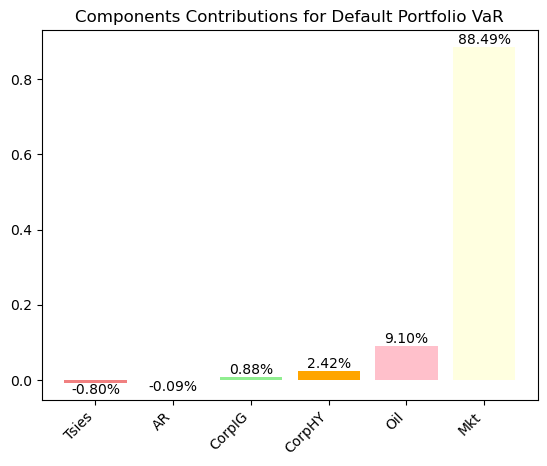

In [181]:
# Filter out the "sum" asset
var_decomposition_D_filtered = var_decomposition_D[var_decomposition_D['asset'] != 'sum']

# Sort the filtered DataFrame by '%VaR contribution'
var_decomposition_D_sorted = var_decomposition_D_filtered.sort_values(by='%VaR contribution')

# Extract relevant columns from the sorted DataFrame
labels_D = var_decomposition_D_sorted['asset']
var_values_D = var_decomposition_D_sorted['%VaR contribution']

# Define standard colors for the chart
standard_colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'pink', 'lightyellow', 'lightgrey']

# Create a vertical bar chart with standard colors
fig, ax = plt.subplots()
bars_D = ax.bar(labels_D, var_values_D, color=standard_colors)

# Add data values to the bars
for bar_D in bars_D:
    yval_D = bar_D.get_height()
    plt.text(bar_D.get_x() + bar_D.get_width()/2, yval_D, f'{yval_D:.2%}', va='bottom' if yval_D > 0 else 'top', ha='center')

# Add a title
plt.title('Components Contributions for Default Portfolio VaR')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the bar chart
plt.show()

For augmented portfolio:

In [182]:
portfolio_var_A = Z_VaR * volatilities_A[-1]
mariginal_var_A = slopes_A * np.array(portfolio_var_A)
component_var_A = mariginal_var_A * weights_A
proportion_var_A = component_var_A / np.sum(component_var_A)
proportion_var_A = np.append(proportion_var_A, np.sum(proportion_var_A))

mariginal_var_A = np.append(mariginal_var_A, np.sum(mariginal_var_A))
component_var_A = np.append(component_var_A, np.sum(component_var_A))

In [183]:
var_decomposition_A = pd.DataFrame({
    'asset': ['Mkt', 'Tsies', 'AR', 'sum'],
    'Marginal VaR': [mariginal_var_A[i] for i in range(4)],
    'Component VaR': [component_var_A[i] for i in range(4)],
    '%VaR contribution': [proportion_var_A[i] for i in range(4)],
})
var_decomposition_A

,asset,Marginal VaR,Component VaR,%VaR contribution
0,Mkt,0.033362,0.013345,0.808439
1,Tsies,0.002506,0.000877,0.053140
2,AR,0.009139,0.002285,0.138421
3,sum,0.045007,0.016507,1.000000


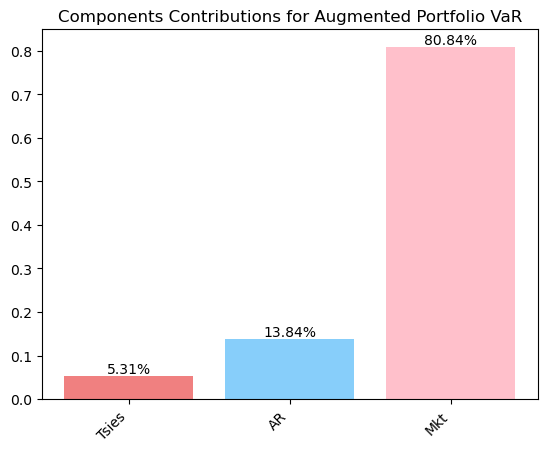

In [184]:
# Filter out the "sum" asset
var_decomposition_A_filtered = var_decomposition_A[var_decomposition_A['asset'] != 'sum']

# Sort the filtered DataFrame by '%VaR contribution'
var_decomposition_A_sorted = var_decomposition_A_filtered.sort_values(by='%VaR contribution')

# Extract relevant columns from the sorted DataFrame
labels_A = var_decomposition_A_sorted['asset']
var_values_A = var_decomposition_A_sorted['%VaR contribution']

# Define standard colors for the chart
standard_colors = ['lightcoral', 'lightskyblue', 'pink', 'lightgrey']

# Create a vertical bar chart with standard colors
fig, ax = plt.subplots()
bars_A = ax.bar(labels_A, var_values_A, color=standard_colors)

# Add data values to the bars
for bar_A in bars_A:
    yval_A = bar_A.get_height()
    plt.text(bar_A.get_x() + bar_A.get_width()/2, yval_A, f'{yval_A:.2%}', va='bottom' if yval_A > 0 else 'top', ha='center')

# Add a title
plt.title('Components Contributions for Augmented Portfolio VaR')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the bar chart
plt.show()

### D. Decomposing ES

Daily 95% ES

For default portfolio:

In [185]:
portfolio_es_D = norm.pdf(norm.ppf(0.95))/(1-0.95) * volatilities_D[-1]
mariginal_es_D = slopes_D * np.array(portfolio_es_D)
component_es_D = mariginal_es_D * weights_D
proportion_es_D = component_es_D / np.sum(component_es_D)
proportion_es_D = np.append(proportion_es_D, np.sum(proportion_es_D))

mariginal_es_D = np.append(mariginal_es_D, np.sum(mariginal_es_D))
component_es_D = np.append(component_es_D, np.sum(component_es_D))

In [186]:
es_decomposition_D = pd.DataFrame({
    'asset': ['Mkt', 'Tsies', 'CorpIG', 'CorpHY', 'AR', 'Oil','sum'],
    'Marginal ES': [mariginal_es_D[i] for i in range(7)],
    'Component ES': [component_es_D[i] for i in range(7)],
    '%ES contribution': [proportion_es_D[i] for i in range(7)],
})
es_decomposition_D

,asset,Marginal ES,Component ES,%ES contribution
0,Mkt,0.048560,0.024280,0.884930
1,Tsies,-0.001100,-0.000220,-0.008020
2,CorpIG,0.004806,0.000240,0.008758
3,CorpHY,0.013259,0.000663,0.024162
4,AR,-0.000159,-0.000024,-0.000871
5,Oil,0.049959,0.002498,0.091041
6,sum,0.115324,0.027437,1.000000


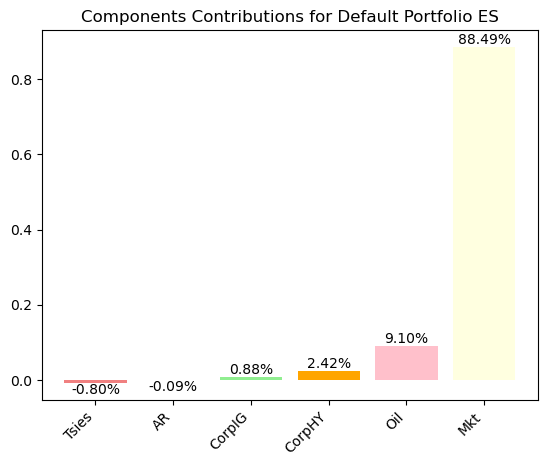

In [187]:
# Filter out the "sum" asset
es_decomposition_D_filtered = es_decomposition_D[es_decomposition_D['asset'] != 'sum']

# Sort the filtered DataFrame by '%ES contribution'
es_decomposition_D_sorted = es_decomposition_D_filtered.sort_values(by='%ES contribution')

# Extract relevant columns from the sorted DataFrame
labels_D = es_decomposition_D_sorted['asset']
es_values_D = es_decomposition_D_sorted['%ES contribution']

# Define standard colors for the chart
standard_colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'orange', 'pink', 'lightyellow', 'lightgrey']

# Create a vertical bar chart with standard colors
fig, ax = plt.subplots()
bars_D = ax.bar(labels_D, es_values_D, color=standard_colors)

# Add data values to the bars
for bar_D in bars_D:
    yval_D = bar_D.get_height()
    plt.text(bar_D.get_x() + bar_D.get_width()/2, yval_D, f'{yval_D:.2%}', va='bottom' if yval_D > 0 else 'top', ha='center')

# Add a title
plt.title('Components Contributions for Default Portfolio ES')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the bar chart
plt.show()

For augmented portfolio:

In [188]:
portfolio_es_A = norm.pdf(norm.ppf(0.95))/(1-0.95) * volatilities_A[-1]
mariginal_es_A = slopes_A * np.array(portfolio_es_A)
component_es_A = mariginal_es_A * weights_A
proportion_es_A = component_es_A / np.sum(component_es_A)
proportion_es_A = np.append(proportion_es_A, np.sum(proportion_es_A))

mariginal_es_A = np.append(mariginal_es_A, np.sum(mariginal_es_A))
component_es_A = np.append(component_es_A, np.sum(component_es_A))

In [189]:
es_decomposition_A = pd.DataFrame({
    'asset': ['Mkt', 'Tsies', 'AR', 'sum'],
    'Marginal ES': [mariginal_es_A[i] for i in range(4)],
    'Component ES': [component_es_A[i] for i in range(4)],
    '%ES contribution': [proportion_es_A[i] for i in range(4)],
})
es_decomposition_A

,asset,Marginal ES,Component ES,%ES contribution
0,Mkt,0.041837,0.016735,0.808439
1,Tsies,0.003143,0.001100,0.053140
2,AR,0.011461,0.002865,0.138421
3,sum,0.056441,0.020700,1.000000


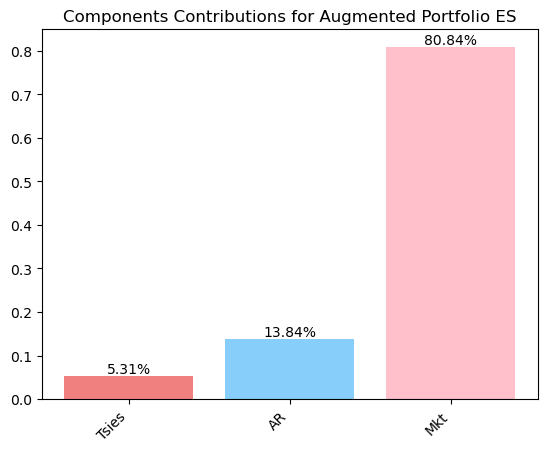

In [190]:
# Filter out the "sum" asset
es_decomposition_A_filtered = es_decomposition_A[es_decomposition_A['asset'] != 'sum']

# Sort the filtered DataFrame by '%ES contribution'
es_decomposition_A_sorted = es_decomposition_A_filtered.sort_values(by='%ES contribution')

# Extract relevant columns from the sorted DataFrame
labels_A = es_decomposition_A_sorted['asset']
es_values_A = es_decomposition_A_sorted['%ES contribution']

# Define standard colors for the chart
standard_colors = ['lightcoral', 'lightskyblue', 'pink', 'lightgrey']

# Create a vertical bar chart with standard colors
fig, ax = plt.subplots()
bars_A = ax.bar(labels_A, es_values_A, color=standard_colors)

# Add data values to the bars
for bar_A in bars_A:
    yval_A = bar_A.get_height()
    plt.text(bar_A.get_x() + bar_A.get_width()/2, yval_A, f'{yval_A:.2%}', va='bottom' if yval_A > 0 else 'top', ha='center')

# Add a title
plt.title('Components Contributions for Augmented Portfolio ES')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')

# Show the bar chart
plt.show()

# Question 2

## Skewness and kurtosis

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


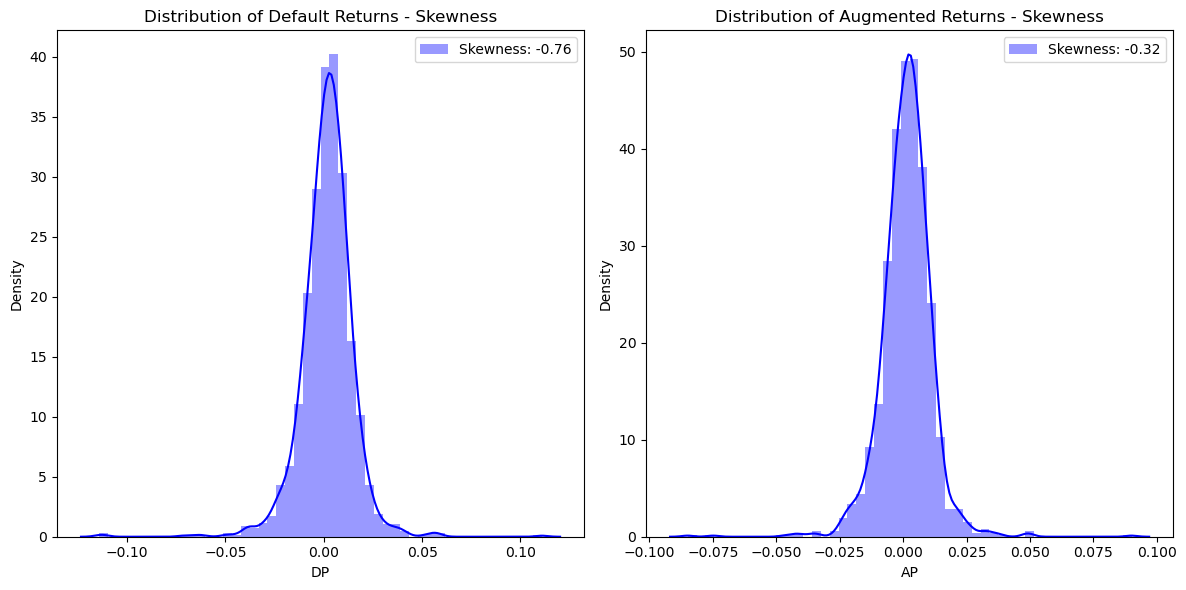

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


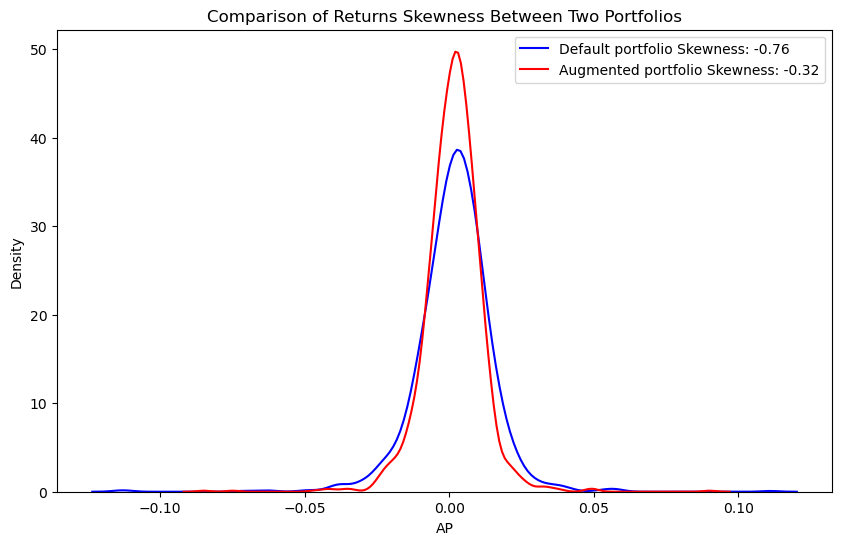

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


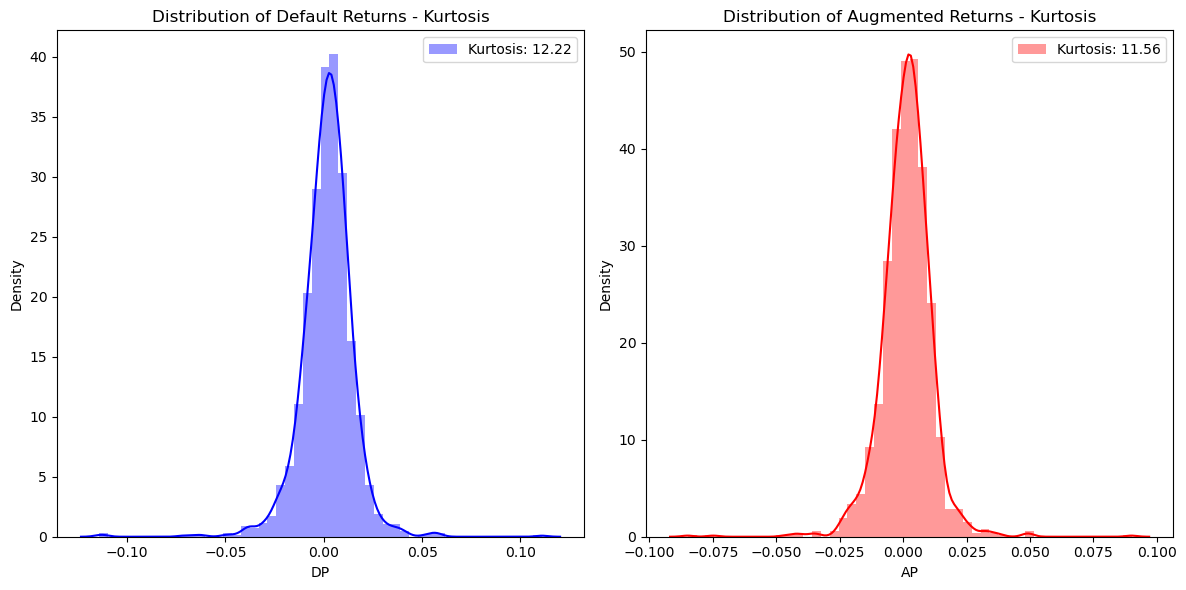

In [191]:
import seaborn as sns
from scipy.stats import skew, kurtosis

total_returns["DP"]
total_returns["AP"]

# Calculate skewness and kurtosis
skewness_DP = skew(total_returns["DP"])
kurtosis_DP = kurtosis(total_returns["DP"], fisher=True)  # Fisher=True returns the excess kurtosis
skewness_AP = skew(total_returns["AP"])
kurtosis_AP = kurtosis(total_returns["AP"], fisher=True)

# Skewness plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.distplot(total_returns["DP"], color='blue', label=f'Skewness: {skewness_DP:.2f}')
plt.title('Distribution of Default Returns - Skewness')
plt.legend()
plt.subplot(1, 2, 2)
sns.distplot(total_returns["AP"], color='blue', label=f'Skewness: {skewness_AP:.2f}')
plt.title('Distribution of Augmented Returns - Skewness')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

sns.distplot(total_returns["DP"], color='blue', label=f'Default portfolio Skewness: {skewness_DP:.2f}', hist=False, kde=True)
sns.distplot(total_returns["AP"], color='red', label=f'Augmented portfolio Skewness: {skewness_AP:.2f}', hist=False, kde=True)

plt.title('Comparison of Returns Skewness Between Two Portfolios')
plt.legend()

plt.show()

# Kurtosis plot
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.distplot(total_returns["DP"], color='blue', label=f'Kurtosis: {kurtosis_DP:.2f}')
plt.title('Distribution of Default Returns - Kurtosis')
plt.legend()
plt.subplot(1, 2, 2)
sns.distplot(total_returns["AP"], color='red', label=f'Kurtosis: {kurtosis_AP:.2f}')
plt.title('Distribution of Augmented Returns - Kurtosis')
plt.legend()

plt.tight_layout()
plt.show()

Using empirical returns, the augmented portfolio shows both a reduction in absolute skewness and excess kurtosis.

## Plot of z-scores

In [ ]:
EWMA_Volatilities['DP_Z']
EWMA_Volatilities['AP_Z']

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.hist(EWMA_Volatilities['DP_Z'], bins=50, alpha=0.75, color='blue')
plt.title('Histogram of Default Portfolio z-scores')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(EWMA_Volatilities['AP_Z'], bins=50, alpha=0.75, color='red')
plt.title('Histogram of Augmented Portfolio z-scores')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

plt.figure(figsize=(10, 6))

sns.distplot(EWMA_Volatilities['DP_Z'], color='blue', label=f'Default portfolio z-scores', hist=False, kde=True)
sns.distplot(EWMA_Volatilities['AP_Z'], color='red', label=f'Augmented portfolio z-scores', hist=False, kde=True)

plt.title('Default vs. Augmented portfolio z-scores')
plt.legend()
plt.show()

## CRAP and CCRAP

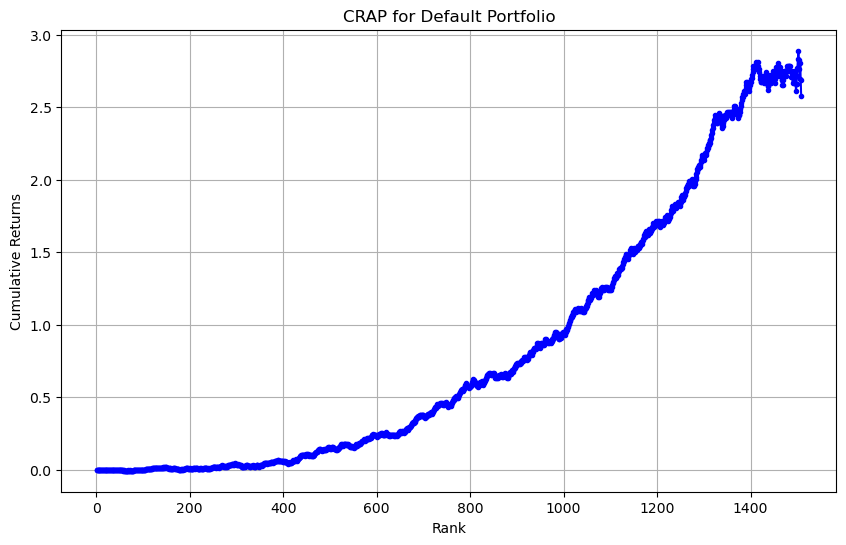

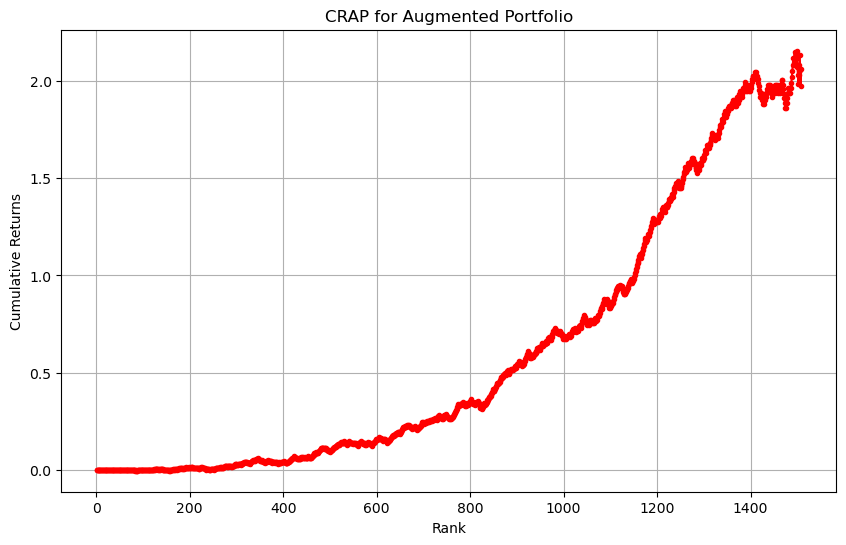

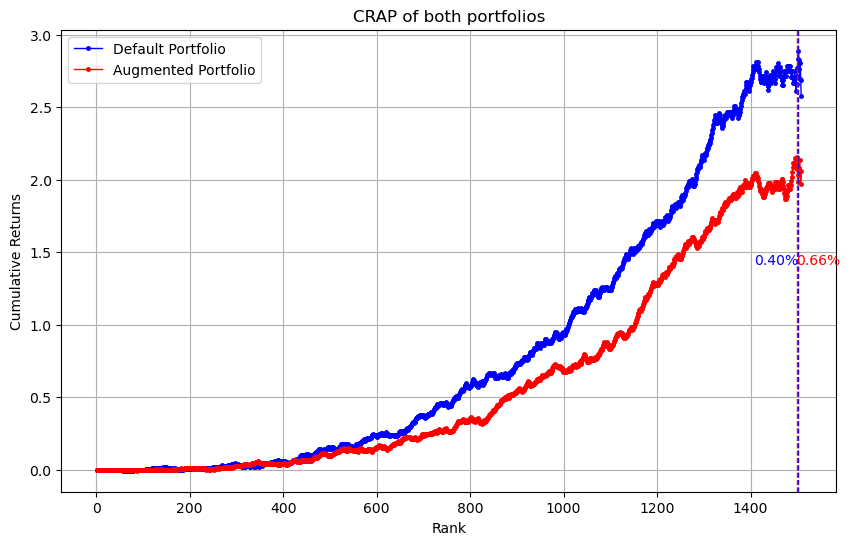

In [193]:
# CRAP
total_returns['abs_returns_DP'] = total_returns["DP"].abs()
total_returns['abs_returns_AP'] = total_returns["AP"].abs()
total_returns['rank_DP'] = total_returns['abs_returns_DP'].rank(method='first')
total_returns['rank_AP'] = total_returns['abs_returns_AP'].rank(method='first')

total_returns_DP_sorted = total_returns.sort_values(by='rank_DP')
total_returns_AP_sorted = total_returns.sort_values(by='rank_AP')
total_returns_DP_sorted['cum_returns'] = total_returns_DP_sorted['DP'].cumsum()
total_returns_AP_sorted['cum_returns'] = total_returns_AP_sorted['AP'].cumsum()

# Plot for DP
plt.figure(figsize=(10, 6))
plt.plot(total_returns_DP_sorted['rank_DP'], total_returns_DP_sorted['cum_returns'], marker='.', linestyle='-', color='blue')
plt.title('CRAP for Default Portfolio')
plt.xlabel('Rank')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()

# Plot for AP
plt.figure(figsize=(10, 6))
plt.plot(total_returns_AP_sorted['rank_AP'], total_returns_AP_sorted['cum_returns'], marker='.', linestyle='-', color='red')
plt.title('CRAP for Augmented Portfolio')
plt.xlabel('Rank')
plt.ylabel('Cumulative Returns')
plt.grid(True)
plt.show()

# Plots combined
max_rank_DP = total_returns_DP_sorted.loc[total_returns_DP_sorted['cum_returns'].idxmax(), 'rank_DP']
max_rank_AP = total_returns_AP_sorted.loc[total_returns_AP_sorted['cum_returns'].idxmax(), 'rank_AP']

percentage_to_the_right_DP = ((len(total_returns_DP_sorted) - max_rank_DP) / len(total_returns_DP_sorted)) * 100
percentage_to_the_right_AP = ((len(total_returns_AP_sorted) - max_rank_AP) / len(total_returns_AP_sorted)) * 100



plt.figure(figsize=(10, 6))
plt.plot(total_returns_DP_sorted['rank_DP'], total_returns_DP_sorted['cum_returns'], label='Default Portfolio', marker='.', linestyle='-', linewidth=1, markersize=5, color='blue')
plt.plot(total_returns_AP_sorted['rank_AP'], total_returns_AP_sorted['cum_returns'], label='Augmented Portfolio', marker='.', linestyle='-', linewidth=1, markersize=5, color='red')
plt.axvline(x=max_rank_DP, color='blue', linestyle='--', linewidth=1)
plt.axvline(x=max_rank_AP, color='red', linestyle='--', linewidth=1)

ymin, ymax = plt.gca().get_ylim()
y_midpoint = (ymax + ymin) / 2
plt.text(max_rank_DP, y_midpoint, f'{percentage_to_the_right_DP:.2f}%',
         ha='right', va='center', rotation=0, color='blue')
plt.text(max_rank_AP, y_midpoint, f'{percentage_to_the_right_AP:.2f}%',
         ha='left', va='center', rotation=0, color='red')
plt.title('CRAP of both portfolios')
plt.xlabel('Rank')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

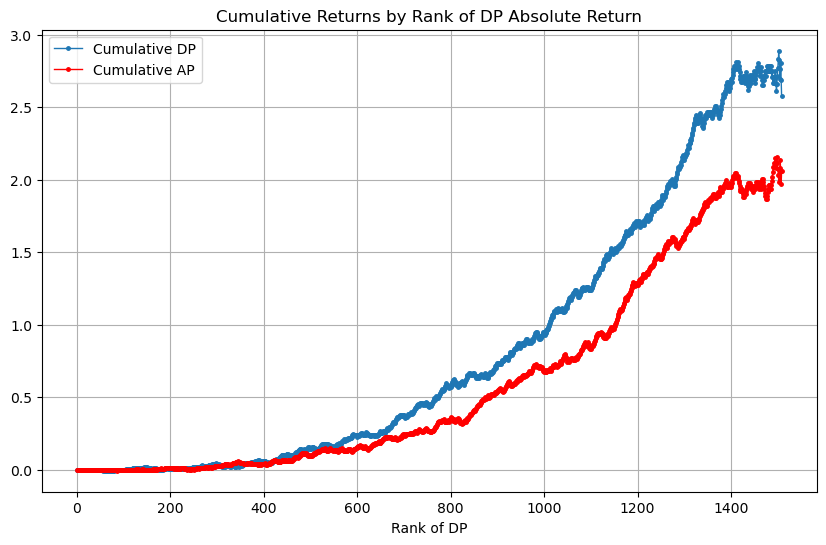

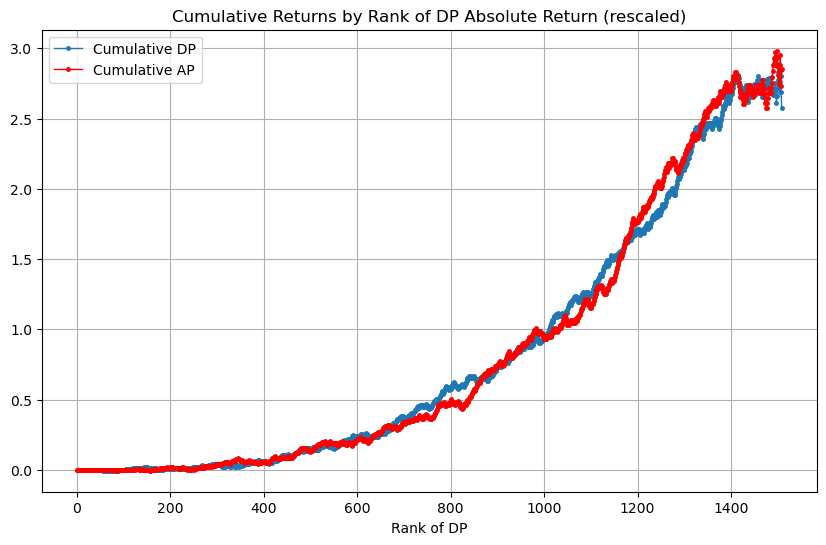

In [194]:
# CCRAP

plt.figure(figsize=(10, 6))
plt.plot(total_returns_DP_sorted['rank_DP'], total_returns_DP_sorted['cum_returns'], label='Cumulative DP', marker='.', linestyle='-', linewidth=1, markersize=5)
plt.plot(total_returns_DP_sorted['rank_DP'], total_returns_AP_sorted['cum_returns'], label='Cumulative AP', marker='.', linestyle='-', linewidth=1, markersize=5, color='red')
plt.title('Cumulative Returns by Rank of DP Absolute Return')
plt.xlabel('Rank of DP')
plt.legend()
plt.grid("true")

# with rescaling of AP

total_returns_AP_sorted["cum_returns"] = total_returns_AP_sorted["cum_returns"] * total_returns_DP_sorted["cum_returns"].mean() / total_returns_AP_sorted["cum_returns"].mean()
plt.figure(figsize=(10, 6))
plt.plot(total_returns_DP_sorted['rank_DP'], total_returns_DP_sorted['cum_returns'], label='Cumulative DP', marker='.', linestyle='-', linewidth=1, markersize=5)
plt.plot(total_returns_DP_sorted['rank_DP'], total_returns_AP_sorted['cum_returns'], label='Cumulative AP', marker='.', linestyle='-', linewidth=1, markersize=5, color='red')
plt.title('Cumulative Returns by Rank of DP Absolute Return (rescaled)')
plt.xlabel('Rank of DP')
plt.legend()
plt.grid("true")

The augmented portfolio creates a hedge against tail risk.

# Question 3